<a href="https://colab.research.google.com/github/userlalo/Nearshoring/blob/main/Nearshoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING

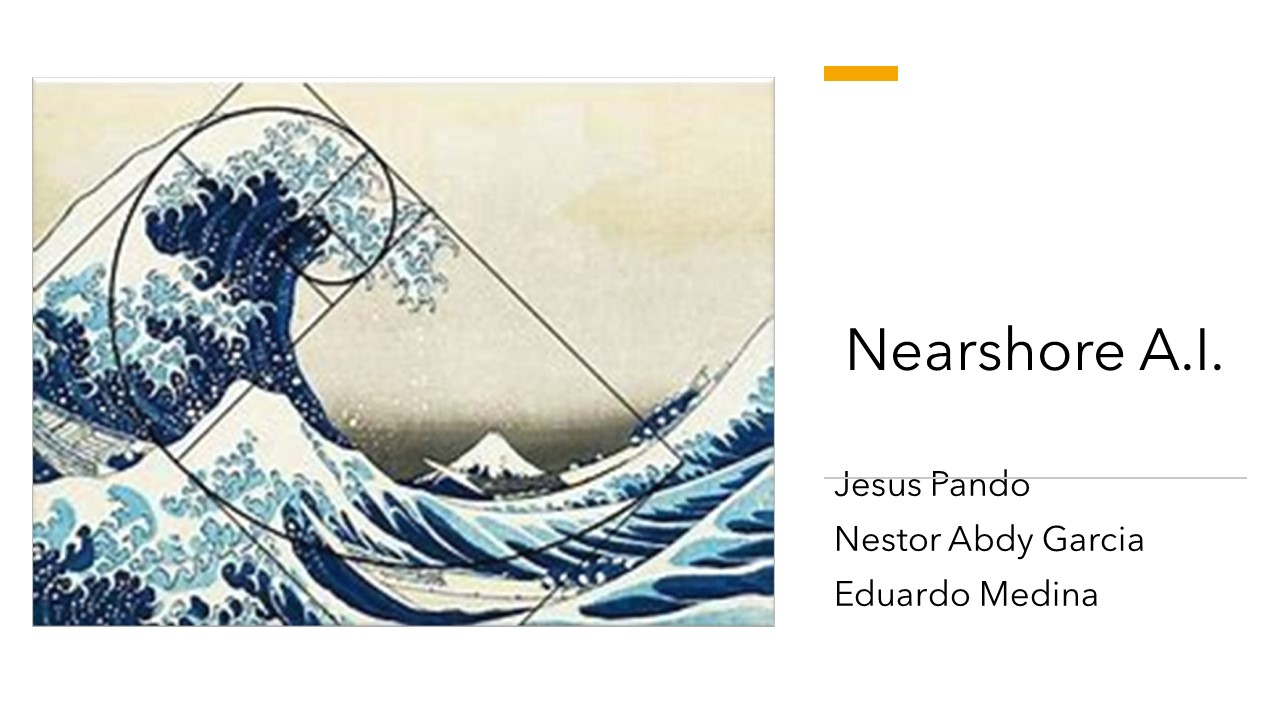

0. Planteamiento del problema
  1. Identificación del problema
  2. Planteamiento de preguntas
  3. Colección de datos y exploración del dataframe
1. Estimados de loación y variabilidad
2. Introducción a la visualización de datos: Distribuciones
3. Exploración de Variables Categóricas y Análisis Multivariable
4. Correlaciones y Regresión Linear Simple
5. Distribuciones muestrales y técnicas de evaluación de modelos
6. Visualización de Datos Avanzada
7. Pruebas A/B y Procesamiento de Lenguaje Natural
8. Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

---
**EQUIPO G17**
* García Fragoso Nestor Abdy
* Medina Rodríguez Eduardo
* Pando Barrón Jesús

## Planteamiento del problema




### 0.1 - Identificación del problema
*   Identificación y justificación
  *   México es uno de los países de América Latina con mayor potencial de crecimento y bienestar para sus habitantes, fenomenos mundiales como el Nearshoring y el acceso a la mayor zona economica del mundo a través de el tratado de Mexico - Estados Unidos - Canada (T-MEC), Se perfila México como una economia competente con nivel educativo, mano de obra capacitada, Acceso a TI y talento.  Sin embargo, México al ser un país tan variado cuenta con distintas realidades a nivel entidad federativa y municipal, por lo que es necesario contar con información que permita realizar diagnósticos más específicos para cada zona geográfica.  
  *   Analizar los fenomenos que afecten un eficiente despliegue de actividades de Nearshoring, para industrias de manufactura, bienes y servicios. 
  El fenómeno delictivo de una región es uno de los altos riesgos o problematicas que los empresarios detectan en sus operaciones, asi como el acceso a TI y nivel educativo requiere por lo menos analizar la incidencia delictiva, tanto en términos absolutos como tasas por habitantes, considerando los tipo de delito, la forma de comisión de delitos, así como el perfil de las víctimas. 
  *   Siendo el 7o pais del mundo en manufactura de automobiles se depliega un analisis para empresas de manufactura y las locaciones geograficas optimas para inversion. .  


*   Investigación preliminar
  *   Existe información por país en el portal de United Nations Office of Drugs and Crimes /https://dataunodc.un.org/content/country-list que provee una información sobre tasas de incidencia de algunos delitos.  
  *   El gobierno de México, a través de la página del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP) ofrece datos de carpetas de investigación iniciadas por delitos del fuero común para el periodo 2015-2022 en formato CSV por estado y municipio, así como bases de datos sobre el perfil de las víctimas de algunos delitos del fuero común /https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published
  *   El gobierno de México, a través de la página del Consejo Nacional de Población (CONAPO) ofrece datos públicos en formato CSV sobre las proyecciones de población de los Municipios de México 2015-2030 /https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2016-2050/resource/0e21e97e-1faf-4045-8dc2-06691e0379a8?inner_span=True
  *   El Banco Mundial ofrece datos acerca del Producto Interno Bruto (PIB) de diversos países, entre ellos México, por lo que se pudieran realizar análisis para ver si los niveles delictivos de crímenes violentos impactan positiva o negativament en los niveles del PIB.

*   Existen análisis de fenómenos delitivos en otras latitudes, por ejemplo: 
 
  *   Chicago Crime /https://www.kaggle.com/datasets/chicago/chicago-crime, en donde se analizó el incremento de incidencia de delitos de un año a otro, en cuál mes tiene mayor ocurrencia un delito en particular, y cómo la temperatura afecta al comportamiento del fenómeno delictivo. 
  *   Crimes in Boston /https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston, en donde se analizó cuáles eran los delitos de mayor ocurrencia, los lugares de mayor ocurrencia de delitos, y si la frecuencia de delito varía en determinado periodo de tiempo.

---

In [ ]:
import pandas as pd
import folium
import numpy as np
import seaborn as sns
import plotly.express as px
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df= pd.read_csv('https://raw.githubusercontent.com/userlalo/Manufacturing/main/manufacturing.csv')
problematica= pd.read_csv('https://raw.githubusercontent.com/userlalo/Manufacturing/main/Unidades-economicas-segun-las-problematicas-que-enfrentan-empresas-con-251-y-mas-personas.csv')
municipality= pd.read_csv('https://raw.githubusercontent.com/userlalo/Manufacturing/main/Ingreso-total-segun-municipios-2019.csv')

In [ ]:
problematica = problematica.rename(columns={'Percentage': 'Porcentaje'})
problematica['Company Problem']= problematica['Company Problem'].replace("Public Insecurity","Inseguridad Publica")
problematica['Company Problem']= problematica['Company Problem'].replace("Other(IT access, education)","Educacion /Acceso IT")
problematica['Company Problem']= problematica['Company Problem'].replace("High service cost","Alto Costo Servicios")
problematica['Company Problem']= problematica['Company Problem'].replace("High taxes","Impuestos Altos")
problematica['Company Problem']= problematica['Company Problem'].replace("High cost of raw materials","Alto costo de materiales")
problematica['Company Problem']= problematica['Company Problem'].replace("excess government paperwork","Tramites gubernamentales")
problematica['Company Problem']= problematica['Company Problem'].replace("low demand of products & services","Baja demanda de productos y servicios")

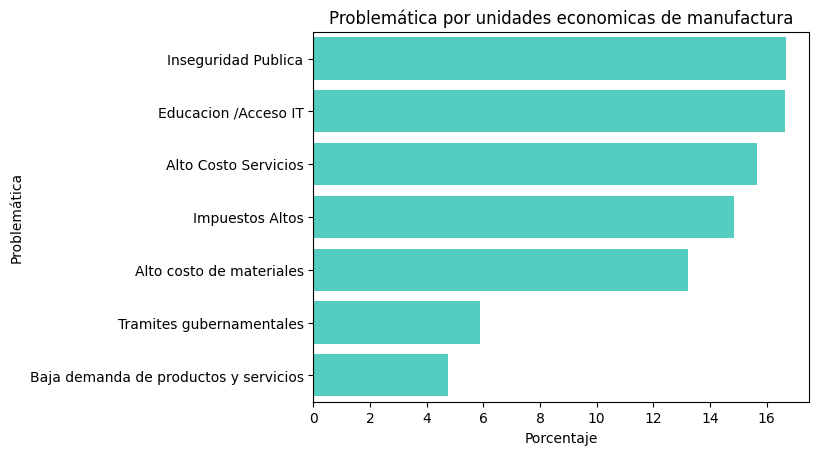

In [ ]:
ax = sns.barplot(y=problematica['Company Problem'],x=problematica['Porcentaje'], color='turquoise')
ax.set_title('Problemática por unidades economicas de manufactura')
ax.set(ylabel='Problemática');

### 0.2 - Planteamiento de preguntas

*   5 Preguntas pertinentes sobre el tema 

 *   ¿Cuáles son los delitos con mayor incidencia en México, tanto en números absolutos como en delitos por cada 100 mil habitantes?
 *   ¿Cuáles son las entidades del país con mayores tasas de delitos graves, es decir, aquellos contra la vida y la integridad personal? y que afectan a las empresas en su crecimiento
 *   ¿Cuales son las regiones optimas para inversion de empresas de manufactura? (Automotriz, metalmecanica)
  *   ¿Cuales son las regiones optimas para inversion de empresas de bienes y servicios? (SAAS, FINTECH)


### 0.3 - Colección de datos y exploración del dataframe

#Bases de datos publicas del gobierno de Mexico


*   /https://datamexico.org/es/profile/industry/manufacturing?companySize1=4&fdiYearState=2022&measuresIndicatorMunSector=Total%20Income&optionsSelector1=Total%20Investment
*   /https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published
*  /https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2016-2050/resource/0e21e97e-1faf-4045-8dc2-06691e0379a8?inner_span=True
*  /https://www.cp-kcsmergereis.com/


### INPC 
https://www.inegi.org.mx/programas/inpc/2018/#Datos_abiertos

### PIB Por estado (PIBE)
https://www.inegi.org.mx/programas/pibent/2013/#Datos_abiertos



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/datos_delitos_por_entidad_2015_2022.csv')

In [ ]:
df.shape

(82944, 12)

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82944 entries, 0 to 82943
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   año                     82944 non-null  int64 
 1   mes                     82944 non-null  object
 2   clave_entidad           82944 non-null  int64 
 3   entidad                 82944 non-null  object
 4   bien_jurídico_afectado  82944 non-null  object
 5   tipo_de_delito          82944 non-null  object
 6   subtipo_de_delito       82944 non-null  object
 7   sexo                    82944 non-null  object
 8   delitos_mensuales       82944 non-null  int64 
 9   delitos_anuales         82944 non-null  int64 
 10  población               82944 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 7.0+ MB


In [ ]:
df

año        mes  clave_entidad                          entidad  \
0      2015      enero              1                   Aguascalientes   
1      2015      enero              1                   Aguascalientes   
2      2015      enero              2                  Baja California   
3      2015      enero              2                  Baja California   
4      2015      enero              3              Baja California Sur   
...     ...        ...            ...                              ...   
82939  2022  diciembre             30  Veracruz de Ignacio de la Llave   
82940  2022  diciembre             31                          Yucatán   
82941  2022  diciembre             31                          Yucatán   
82942  2022  diciembre             32                        Zacatecas   
82943  2022  diciembre             32                        Zacatecas   

      bien_jurídico_afectado      tipo_de_delito   subtipo_de_delito     sexo  \
0              El patrimonio           Extorsión           Extorsión  Hombres   
1              El patrimonio           Extorsión           Extorsión  Mujeres   
2              El patrimonio           Extorsión           Extorsión  Hombres   
3              El patrimonio           Extorsión           Extorsión  Mujeres   
4              El patrimonio           Extorsión           Extorsión  Hombres   
...                      ...                 ...                 ...      ...   
82939      Libertad personal  Tráfico de menores  Tráfico de menores  Mujeres   
82940      Libertad personal  Tráfico de menores  Tráfico de menores  Hombres   
82941      Libertad personal  Tráfico de menores  Tráfico de menores  Mujeres   
82942      Libertad personal  Tráfico de menores  Tráfico de menores  Hombres   
82943      Libertad personal  Tráfico de menores  Tráfico de menores  Mujeres   

       delitos_mensuales  delitos_anuales  población  
0                      1               24     655069  
1                      1               12     676756  
2                      4              127    1681344  
3                      3               90    1676450  
4                      1               27     366671  
...                  ...              ...        ...  
82939                  0                0    4446046  
82940                  0                0    1135464  
82941                  0                0    1172906  
82942                  0                0     829337  
82943                  0                0     859743  

[82944 rows x 11 columns]

In [ ]:
#Calculamos la población total por entidad federativa
df_poblacion=df.drop_duplicates(subset=['año', 'clave_entidad','entidad','población'])[['año', 'clave_entidad','entidad','población']]
df_poblacion=df_poblacion.groupby(['año','clave_entidad','entidad'], as_index=False).sum()
df_poblacion

año  clave_entidad                          entidad  población
0    2015              1                   Aguascalientes    1331825
1    2015              2                  Baja California    3357794
2    2015              3              Baja California Sur     719846
3    2015              4                         Campeche     916832
4    2015              5             Coahuila de Zaragoza    3000556
..    ...            ...                              ...        ...
251  2022             28                       Tamaulipas    3708008
252  2022             29                         Tlaxcala    1410744
253  2022             30  Veracruz de Ignacio de la Llave    8634299
254  2022             31                          Yucatán    2308370
255  2022             32                        Zacatecas    1689080

[256 rows x 4 columns]

## 1 Estimados de Locación y Variabilidad

¿Cuáles son los delitos con mayor incidencia en México, tanto en números absolutos como en delitos por cada 100 mil habitantes?
> Para contestar esta pregunta primero debemos observar los tipos de delitos identificados y observar como estan agrupados según el bien afectado

In [ ]:
bien_afectado=df.drop_duplicates(subset=['bien_jurídico_afectado','tipo_de_delito','subtipo_de_delito'])[['bien_jurídico_afectado','tipo_de_delito','subtipo_de_delito']]
bien_afectado=bien_afectado.reset_index(drop=True)
bien_afectado

bien_jurídico_afectado  \
0                      El patrimonio   
1                        La sociedad   
2                        La sociedad   
3                        La sociedad   
4   La vida y la Integridad corporal   
5   La vida y la Integridad corporal   
6   La vida y la Integridad corporal   
7   La vida y la Integridad corporal   
8   La vida y la Integridad corporal   
9   La vida y la Integridad corporal   
10                 Libertad personal   
11                 Libertad personal   
12                 Libertad personal   
13                 Libertad personal   

                                       tipo_de_delito  \
0                                           Extorsión   
1                               Corrupción de menores   
2                    Otros delitos contra la sociedad   
3                                   Trata de personas   
4                                         Feminicidio   
5                                           Homicidio   
6                                           Homicidio   
7                                            Lesiones   
8                                            Lesiones   
9   Otros delitos que atentan contra la vida y la ...   
10  Otros delitos que atentan contra la libertad p...   
11                                              Rapto   
12                                          Secuestro   
13                                 Tráfico de menores   

                                    subtipo_de_delito  
0                                           Extorsión  
1                               Corrupción de menores  
2                    Otros delitos contra la sociedad  
3                                   Trata de personas  
4                                         Feminicidio  
5                                   Homicidio culposo  
6                                    Homicidio doloso  
7                                   Lesiones culposas  
8                                    Lesiones dolosas  
9   Otros delitos que atentan contra la vida y la ...  
10  Otros delitos que atentan contra la libertad p...  
11                                              Rapto  
12                                          Secuestro  
13                                 Tráfico de menores

In [ ]:
bien_afectado=df.drop_duplicates(subset=['bien_jurídico_afectado'])[['bien_jurídico_afectado']]
bien_afectado=bien_afectado.reset_index(drop=True)
bien_afectado

bien_jurídico_afectado
0                     El patrimonio
1                       La sociedad
2  La vida y la Integridad corporal
3                 Libertad personal

> Se obtuvieron 4 grupos de delitos según el `el bien jurídico afectado`

>El siguiente paso es obtener los estimados de locación y variabilidad de estos 4 grupos de delitos usando los datos mensuales


In [ ]:
#Agrupamos los datos para dejar solo las columnas categoricas que nos interesan, 
#que son año, bien_juridico y tipo de delito
estimados=df.groupby(['año','mes','bien_jurídico_afectado'], as_index=False).sum()
estimados=estimados[['bien_jurídico_afectado','año','mes','población','delitos_mensuales']]


In [ ]:
#Función que devuelve un dataframe con los estimados de locación y variabilidad de los diferentes 
def calculo_estimados(df_datos,df_clases,col_clase,col_datos):
  from scipy import stats
  df=df_clases.copy()
  media=[]
  mediana=[]
  media_truncada=[]
  desv_std=[]
  mínino=[]
  máximo=[]
  rango=[]
  percentil_25=[]
  percentil_75=[]
  rango_intercuartil=[]
  for index, row in df_clases.iterrows():
      filtro = (df_datos[col_clase]==row[col_clase])
      df_datos.filtrado=df_datos[filtro]
      media.append(df_datos.filtrado[col_datos].mean())
      mediana.append(df_datos.filtrado[col_datos].median())
      media_truncada.append(stats.trim_mean(df_datos.filtrado[col_datos],0.1))
      desv_std.append(df_datos.filtrado[col_datos].std())
      mínino.append(df_datos.filtrado[col_datos].min())
      máximo.append(df_datos.filtrado[col_datos].max())
      rango.append(máximo[index]-mínino[index])
      percentil_25.append(df_datos.filtrado[col_datos].quantile(0.25))
      percentil_75.append(df_datos.filtrado[col_datos].quantile(0.75))
      rango_intercuartil.append(percentil_75[index]-percentil_25[index])
  df['media']=media
  df['media_truncada']=media_truncada
  df['desv_std']=desv_std
  df['mínino']=mínino
  df['máximo']=máximo
  df['rango']=rango
  df['percentil_25']=percentil_25
  df['mediana']=mediana
  df['percentil_75']=percentil_75
  df['rango_intercuartil']=rango_intercuartil
  return df



In [ ]:
estimados_delitos=calculo_estimados(estimados,bien_afectado,'bien_jurídico_afectado','delitos_mensuales')
estimados_delitos

bien_jurídico_afectado         media  media_truncada  \
0                     El patrimonio    579.822917      569.012821   
1                       La sociedad    435.218750      428.179487   
2  La vida y la Integridad corporal  20723.666667    20726.102564   
3                 Libertad personal   1684.385417     1654.051282   

      desv_std  mínino  máximo  rango  percentil_25  mediana  percentil_75  \
0   148.207891     378    1056    678        453.00    527.5        683.75   
1   128.273983     216     975    759        332.25    429.0        512.00   
2  2202.727905   15661   27158  11497      19245.50  20685.5      22268.00   
3   435.702418     975    2997   2022       1297.75   1612.5       1969.00   

   rango_intercuartil  
0              230.75  
1              179.75  
2             3022.50  
3              671.25

* De manera genereal podemos obervar que en los 4 tipos del '**bien_jurídico_afectado**' la media es muy cercana a la media truncada y a la mediana. 
  * Podemos afirmar, desde este punto de vista que no hay valores atípicos que se salgan de contexto y que superen al menos las 3 desviaciones estándar.
* En cuanto al rango intercuartílico, los cuartiles y la mediana se puede inferir el tipo de sesgo que presentan según el "**bien_jurídico_afectado**".
  * El patrimonio: Se observa un sesgo hacia la izquierda.
  * La sociedad: Se observa un sesgo hacia la izquierda.
  * La vida y la integridad corporal: Se observa un sesgo hacia al derecha.
  * Libertad personal: Se observa un sesgo hacia la derecha.


```
Podemos observar que los delitos que predominan son aquellos que atentan contra "La vida y la integridad corporal" , 
observando que en un mes se cometen al menos 15,661 delitos de estos delitos y un máximo de 27,158
```

Para la siguiente etapa vamos a acotar el dataframe a aquellos delitos que atentan a la "La vida y la Integridad corporal" para hacer un análisis de los tipos de delitos que entran en esta clasificación. 



## 2 Introducción a la visualización de datos: Distribuciones

In [ ]:
# Obtenemos del dataframe el subconjunto de datos que vamos a utilizar, además el dataframe 
#cuenta con un tipo de delito no identificado . El cual tambien vamos a quitar
filtro = (df['bien_jurídico_afectado']=='La vida y la Integridad corporal') & \
(df['tipo_de_delito']!='Otros delitos que atentan contra la vida y la integridad corporal')
df2=df[filtro]
df2=df2.reset_index(drop=True)
df2_distribuciones=df2.groupby(['año','mes','bien_jurídico_afectado','tipo_de_delito','sexo'],\
                               as_index=False).sum()
df2_distribuciones=df2_distribuciones[['año','mes','delitos_mensuales','bien_jurídico_afectado',\
                                       'tipo_de_delito','sexo']]


In [ ]:
#Mujeres
df2_distribuciones_m=df2_distribuciones[df2_distribuciones['sexo']=='Mujeres']

#Hombres
df2_distribuciones_h=df2_distribuciones[df2_distribuciones['sexo']=='Hombres']

tipo_delitos_m=df2_distribuciones_m.drop_duplicates(subset=['tipo_de_delito'])[['tipo_de_delito','sexo']]
tipo_delitos_m=tipo_delitos_m.reset_index(drop=True)
tipo_delitos_h=df2_distribuciones_h.drop_duplicates(subset=['tipo_de_delito'])[['tipo_de_delito','sexo']]
tipo_delitos_h=tipo_delitos_h.reset_index(drop=True)

In [ ]:
#Obtenemos los estimados de acuerdo al tipo de delito y al sexo
estimados_tipo_delito=pd.concat([calculo_estimados(df2_distribuciones_m,tipo_delitos_m,\
'tipo_de_delito','delitos_mensuales'),calculo_estimados(df2_distribuciones_h,tipo_delitos_h,\
'tipo_de_delito','delitos_mensuales')])


In [ ]:
df2_distribuciones_m

año         mes  delitos_mensuales            bien_jurídico_afectado  \
0    2015       abril                 36  La vida y la Integridad corporal   
2    2015       abril                393  La vida y la Integridad corporal   
4    2015       abril               7716  La vida y la Integridad corporal   
5    2015      agosto                 40  La vida y la Integridad corporal   
7    2015      agosto                419  La vida y la Integridad corporal   
..    ...         ...                ...                               ...   
472  2022     octubre                579  La vida y la Integridad corporal   
474  2022     octubre               7828  La vida y la Integridad corporal   
475  2022  septiembre                 82  La vida y la Integridad corporal   
477  2022  septiembre                517  La vida y la Integridad corporal   
479  2022  septiembre               7734  La vida y la Integridad corporal   

    tipo_de_delito     sexo  
0      Feminicidio  Mujeres  
2        Homicidio  Mujeres  
4         Lesiones  Mujeres  
5      Feminicidio  Mujeres  
7        Homicidio  Mujeres  
..             ...      ...  
472      Homicidio  Mujeres  
474       Lesiones  Mujeres  
475    Feminicidio  Mujeres  
477      Homicidio  Mujeres  
479       Lesiones  Mujeres  

[288 rows x 6 columns]

In [ ]:
df2_distribuciones_h

año         mes  delitos_mensuales            bien_jurídico_afectado  \
1    2015       abril               2140  La vida y la Integridad corporal   
3    2015       abril               9412  La vida y la Integridad corporal   
6    2015      agosto               2570  La vida y la Integridad corporal   
8    2015      agosto               9516  La vida y la Integridad corporal   
11   2015   diciembre               2424  La vida y la Integridad corporal   
..    ...         ...                ...                               ...   
468  2022   noviembre              10530  La vida y la Integridad corporal   
471  2022     octubre               3696  La vida y la Integridad corporal   
473  2022     octubre              11159  La vida y la Integridad corporal   
476  2022  septiembre               3575  La vida y la Integridad corporal   
478  2022  septiembre              11000  La vida y la Integridad corporal   

    tipo_de_delito     sexo  
1        Homicidio  Hombres  
3         Lesiones  Hombres  
6        Homicidio  Hombres  
8         Lesiones  Hombres  
11       Homicidio  Hombres  
..             ...      ...  
468       Lesiones  Hombres  
471      Homicidio  Hombres  
473       Lesiones  Hombres  
476      Homicidio  Hombres  
478       Lesiones  Hombres  

[192 rows x 6 columns]

Obtenemos los estimados de locación y variabilidad de los tipos de delitos, que atentan contra "La vida y la integridad corporal" divididos por el sexo

In [ ]:
estimados_tipo_delito

tipo_de_delito     sexo        media  media_truncada     desv_std  mínino  \
0    Feminicidio  Mujeres    69.697917       70.448718    18.827818      28   
1      Homicidio  Mujeres   489.156250      488.371795    53.305145     369   
2       Lesiones  Mujeres  6837.395833     6864.589744   845.496522    4707   
0      Homicidio  Hombres  3314.510417     3375.833333   510.210545    2090   
1       Lesiones  Hombres  9347.562500     9345.192308  1118.911725    6562   

   máximo  rango  percentil_25  mediana  percentil_75  rango_intercuartil  
0     112     84         59.50     73.0         82.00               22.50  
1     625    256        448.75    488.5        520.75               72.00  
2    8796   4089       6295.25   6887.0       7486.75             1191.50  
0    3966   1876       3003.25   3539.0       3677.50              674.25  
1   12684   6122       8656.00   9335.5      10051.00             1395.00



```
Como podemos observar en este dataframe tenemos muy pocos datos atípicos en los extremos. 
Se hara un análisis visaul de estos conjuntos de datos para indetificar y eliminar los valores atípicos
```



### Boxplots 

Gráficas boxplots de los tipos de delitos, diferenciados por el sexo y el tipo de delito. 
Se estan analizando los delitos en el contexto a nivel República

In [ ]:
# Funciones
def g_boxplot(datos,titulo,x_label):
  import seaborn as sns
  import matplotlib.pyplot as plt
  import pandas as pd
  sns.set(style="whitegrid")
  ax=sns.boxplot(x=datos);
  ax.set_title(titulo)
  ax.set(xlabel=x_label);
  plt.axvline(datos.mean(), c='y')
  return

def comparar_estimados(serie1, serie2):
    import numpy as np
    print(f'{("Estimado"):30}|{("Original"):30}|{("Filtrado"):30}')
    print(f'{"-"*90}')
    print(f'{("Media"):30}|{serie1.mean():<30}|{serie2.mean():<}')
    print(f'{("Mediana"):30}|{serie1.median():<30}|{serie2.median():<}')
    print(f'{("Desviación estándar "):30}|{serie1.std():<30}|{serie2.std():<}')
    return

def iqr_score(serie):
  iqr = serie.quantile(0.75) - serie.quantile(0.25)
  filtro_inferior = serie > serie.quantile(0.25) - (iqr * 1.5)
  filtro_superior = serie < serie.quantile(0.75) + (iqr * 1.5)
  return serie[filtro_inferior & filtro_superior]

#Función para obtener el conjunto de datos segun el tipo de delito
def array_delitos(df,tipo_delito):
  return df[df['tipo_de_delito']==tipo_delito]['delitos_mensuales']

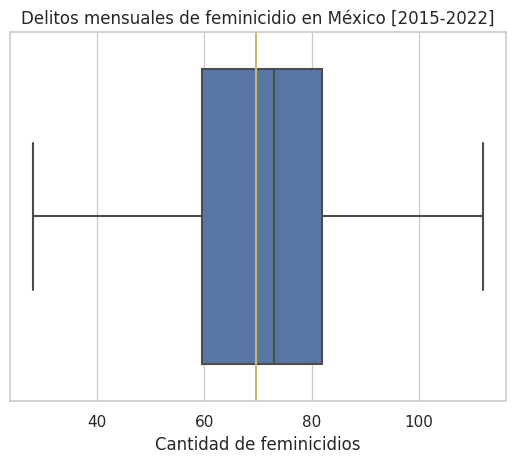

In [ ]:
titulo='Delitos mensuales de feminicidio en México [2015-2022]'
x='Cantidad de feminicidios'
g_boxplot(array_delitos(df2_distribuciones_m,'Feminicidio'),titulo,x)

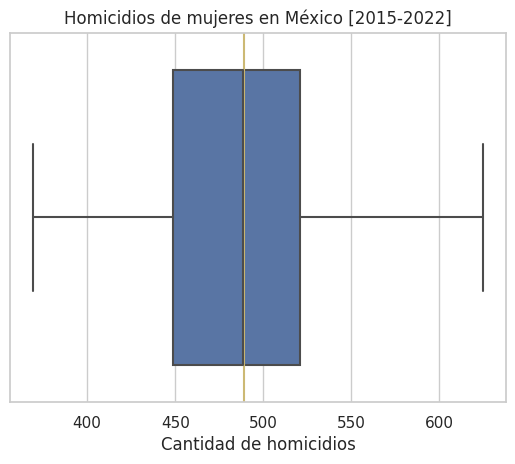

In [ ]:
titulo='Homicidios de mujeres en México [2015-2022]'
x='Cantidad de homicidios'
g_boxplot(array_delitos(df2_distribuciones_m,'Homicidio'),titulo,x)

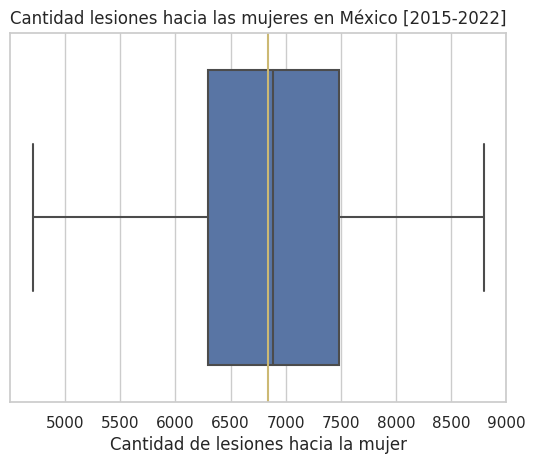

In [ ]:
titulo='Cantidad lesiones hacia las mujeres en México [2015-2022]'
x='Cantidad de lesiones hacia la mujer'
g_boxplot(array_delitos(df2_distribuciones_m,'Lesiones'),titulo,x)

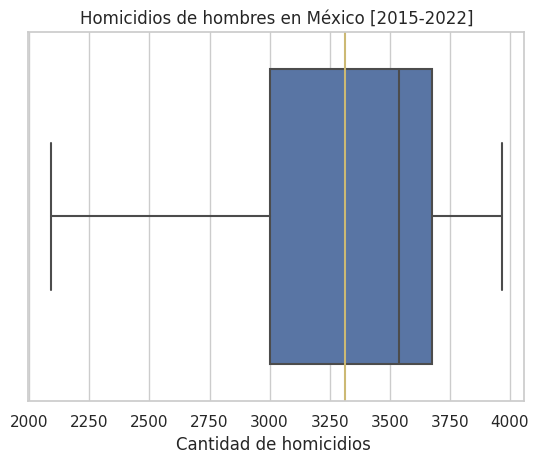

In [ ]:
titulo='Homicidios de hombres en México [2015-2022]'
x='Cantidad de homicidios '
g_boxplot(array_delitos(df2_distribuciones_h,'Homicidio'),titulo,x)

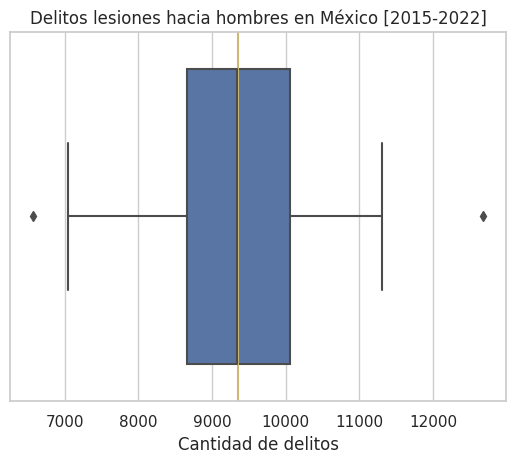

In [ ]:
titulo='Delitos lesiones hacia hombres en México [2015-2022]'
x='Cantidad de delitos'
g_boxplot(array_delitos(df2_distribuciones_h,'Lesiones'),titulo,x)

A partir de las gráficas boxplots que realizados, se observa lo siguiente
* En el conjunto de datos de "**Feminicidio**" existe un sesgo a la izquierda. 
* En el conjunto de datos de "**Homicidio**" donde las víctimas fueron "**Hombres** hay un sesgo importante hacia la izquierda. 
* El conjunto de datos de "**Lesiones**" en **hombres** es el único que muestra valores atípicos extremos


Eliminaremos los valores atípicos usando el Score de Rango Intercuartílico.

Y compararemos los estimados antes y despues de eliminar los valores típicos

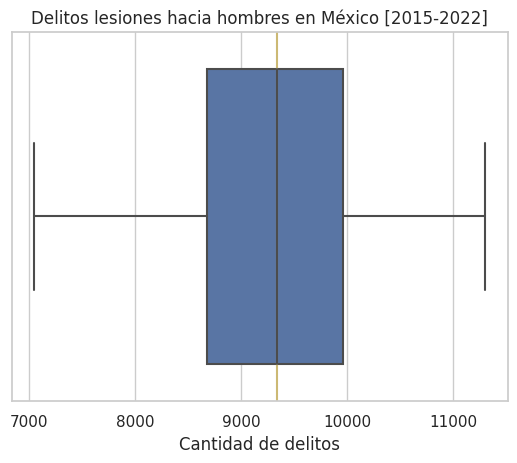

In [ ]:
titulo='Delitos lesiones hacia hombres en México [2015-2022]'
x='Cantidad de delitos'
g_boxplot(iqr_score(array_delitos(df2_distribuciones_h,'Lesiones')),titulo,x)

In [ ]:
comparar_estimados(array_delitos(df2_distribuciones_h,'Lesiones'),\
iqr_score(array_delitos(df2_distribuciones_h,'Lesiones')))

Estimado                      |Original                      |Filtrado                      
------------------------------------------------------------------------------------------
Media                         |9347.5625                     |9341.702127659575
Mediana                       |9335.5                        |9335.5
Desviación estándar           |1118.9117251527086            |1037.1700831038982



> No hay un cambio notable en el valor de los estimados al eliminar los valores atípicos



### Histogramas

Se elaboraran histogramas de estos conjuntos de datos para tener na visaulización distinta.

In [ ]:
def histograma(serie, num_bins,titulo,x_label):
  import seaborn as sns
  from scipy.stats import skew, kurtosis
  ax=sns.distplot(serie, kde=False, norm_hist=False, bins=num_bins)
  ax.set_title(titulo)
  ax.set(xlabel=x_label)
  ax.set(ylabel='Conteo')
  print(f'Curtosis: {kurtosis(serie)}')
  print(f'Asimetría: {skew(serie)}')
  return

Curtosis: -0.18692262672546223
Asimetría: -0.39974888610245346


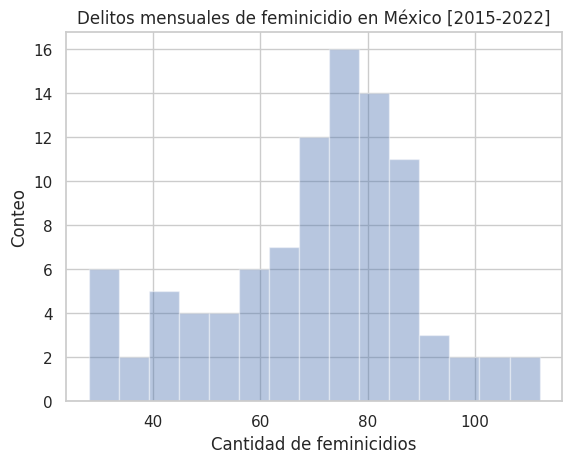

In [ ]:
titulo='Delitos mensuales de feminicidio en México [2015-2022]'
x='Cantidad de feminicidios'
histograma(array_delitos(df2_distribuciones_m,'Feminicidio'),15,titulo,x)

> Tenemos un histograma Asimetría negativa, indica que tiene sesgo a a la izquierda.
El coeficiente de curtosis negativo nos indica que la distribución es Platocúrtica.
Y tenemos pocos datos atipicos agrupados a la izquierda de la distribución. 


Curtosis: -0.16790720206662124
Asimetría: 0.109040352340832


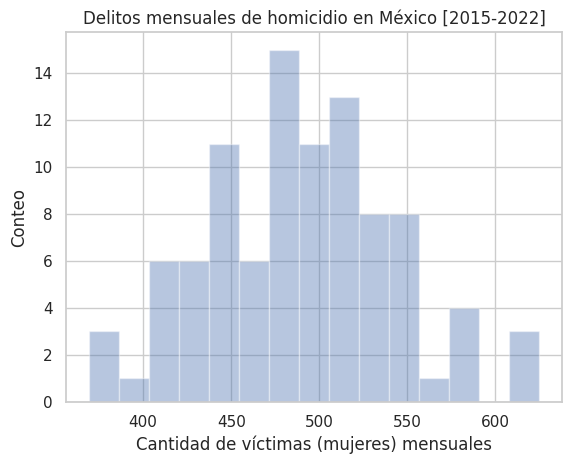

In [ ]:
titulo='Delitos mensuales de homicidio en México [2015-2022]'
x='Cantidad de víctimas (mujeres) mensuales'
histograma(array_delitos(df2_distribuciones_m,'Homicidio'),15,titulo,x)

> Tenemos un histograma Asimetría cercana a 0, indica que tiene la distribución es simétrica.
El coeficiente de curtosis negativo nos indica que la distribución es Platocúrtica.
Y tenemos datos atípicos en el extremo derecho

Curtosis: -0.4145367590786657
Asimetría: -0.23879240808012112


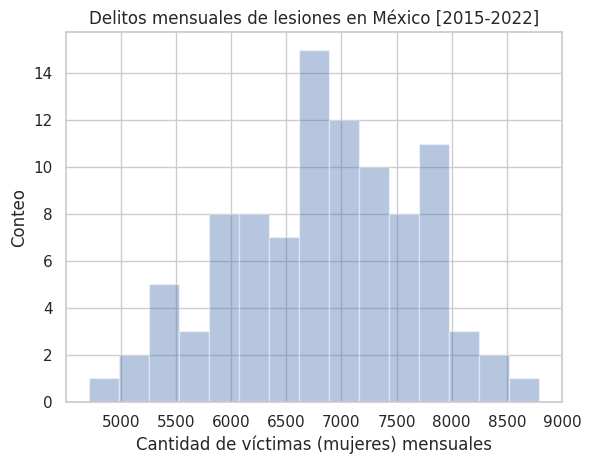

In [ ]:
titulo='Delitos mensuales de lesiones en México [2015-2022]'
x='Cantidad de víctimas (mujeres) mensuales'
histograma(array_delitos(df2_distribuciones_m,'Lesiones'),15,titulo,x)

> Tenemos un histograma Asimetría negativo cercano a 0, indica que la distribución tiene un ligero sesgo a la iziquierda.
El coeficiente de curtosis negativo nos indica que la distribución es Platocúrtica.
No se aprecían datos atípicos en esta dsitribución

Curtosis: -0.16273552243513212
Asimetría: -1.0191270237415304


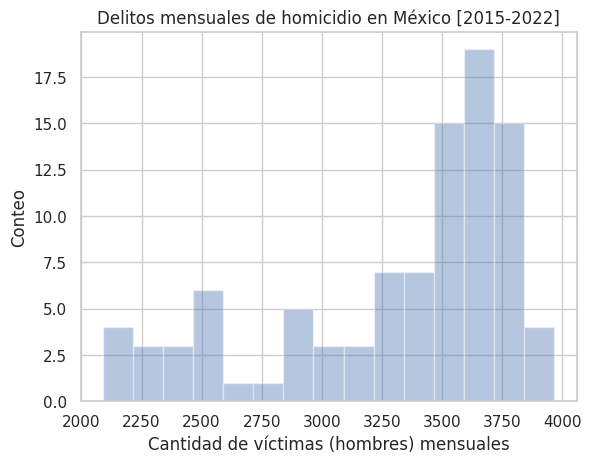

In [ ]:
titulo='Delitos mensuales de homicidio en México [2015-2022]'
x='Cantidad de víctimas (hombres) mensuales'
histograma(array_delitos(df2_distribuciones_h,'Homicidio'),15,titulo,x)

> Tenemos un histograma Asimetría negativo, indica que tiene la distribución esta sesgada a la izquierda.
El coeficiente de curtosis negativo nos indica que la distribución es Platocúrtica.
Hay valores atípicos a la izquierda 

Curtosis: -0.03087863770423427
Asimetría: 0.09285386049668162


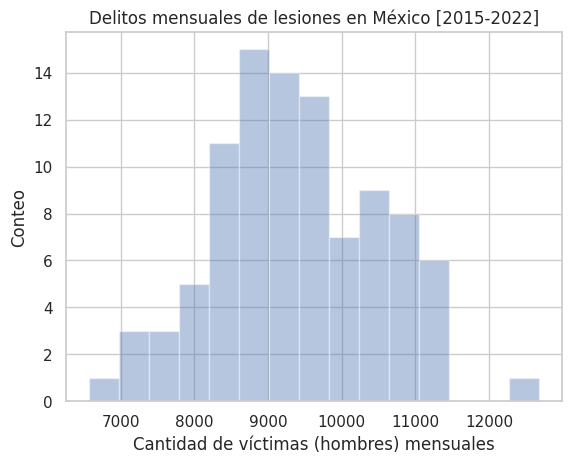

In [ ]:
titulo='Delitos mensuales de lesiones en México [2015-2022]'
x='Cantidad de víctimas (hombres) mensuales'
histograma(array_delitos(df2_distribuciones_h,'Lesiones'),15,titulo,x)

Tenemos un histograma Asimetría negativo muy cercano a 0,  es una distribución simétrica. El coeficiente de curtosis tambien es casi 0 nos indica que la distribución es Mesocúrtica. Tenmos valores atípicos a la derecha.

### Gráficas de densidad

Haremos unas gráficas de densidad para comparar la cantidad de tipos de delitos cometidos mensaulmente según el sexo de la víctima

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

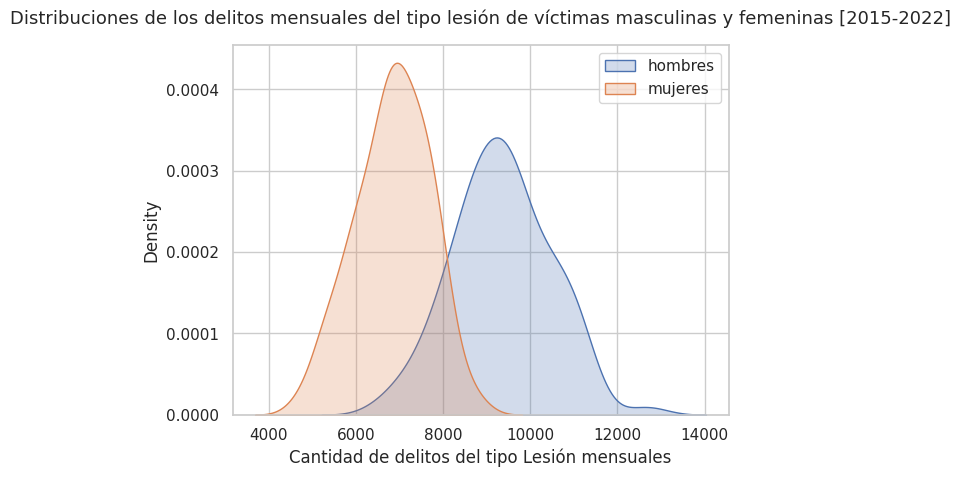

In [ ]:
ax=sns.distplot(array_delitos(df2_distribuciones_h,'Lesiones'), hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(array_delitos(df2_distribuciones_m,'Lesiones'), hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de los delitos mensuales del tipo lesión de víctimas masculinas y femeninas [2015-2022]', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de delitos del tipo Lesión mensuales');
ax.legend(loc='upper right');

Podemos observar en la gráfica  de densidad que ocurren más delitos de tipo de lesiones en la población de hombres que en mujeres.
Tambien observamos que el conjunto de datos para hombres es más disperso que para mujeres, y en este último caso el número de delitos por lesiones en mujeres esta mas concentrado alrededor de la media.

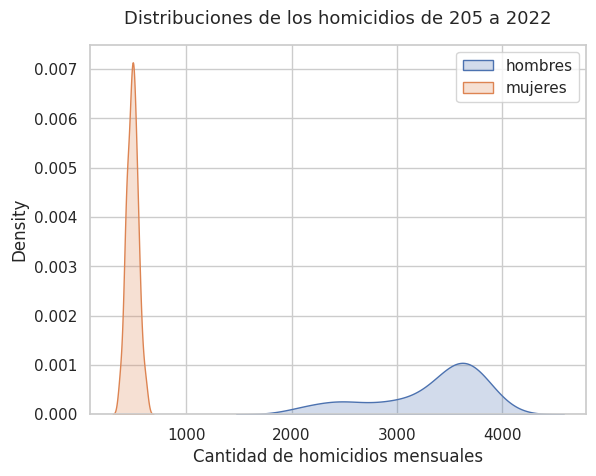

In [ ]:
ax=sns.distplot(array_delitos(df2_distribuciones_h,'Homicidio'), hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(array_delitos(df2_distribuciones_m,'Homicidio'), hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de los homicidios de 205 a 2022', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de homicidios mensuales');
ax.legend(loc='upper right');

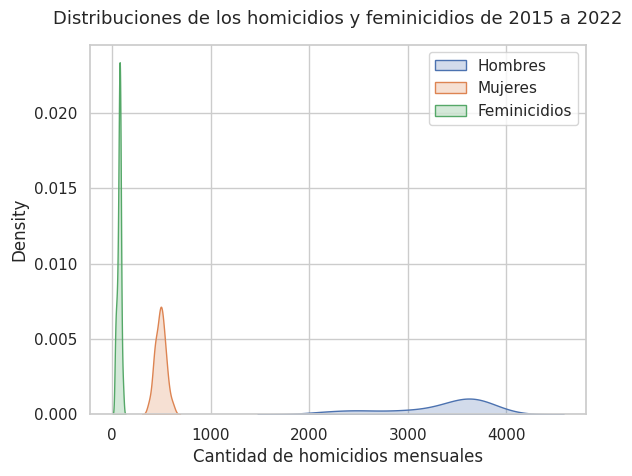

In [ ]:
ax=sns.distplot(array_delitos(df2_distribuciones_h,'Homicidio'), hist=False, kde_kws = {'shade': True}, label='Hombres')
sns.distplot(array_delitos(df2_distribuciones_m,'Homicidio'), hist=False, kde_kws = {'shade': True}, ax=ax, label='Mujeres')
sns.distplot(array_delitos(df2_distribuciones_m,'Feminicidio'), hist=False, kde_kws = {'shade': True}, ax=ax, label='Feminicidios')
ax.set_title('Distribuciones de los homicidios y feminicidios de 2015 a 2022', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de homicidios mensuales');
ax.legend(loc='upper right');

Observamos que el número de los homicidios son más en hombres que en mujeres. Sin embargo esto se debe a que la mayoría de homicidios donde la víctima es mujer es considerado como femenicidio.

Vamos a agregar la distribucion de feminicidios a la gráfica para poder comparar mejor los datos. Sin embargo una vez hecho esto podemos observar que siguen siendo muy pocos los casos de atentados contra las mujeres que en el caso de hombres. 

Esto puede deberse a la falta de denuncias o la minimización de la violencia hacia la mujer.

## 3 Exploración de Variables Categóricas y Análisis Multivariable

En el dataframe orginal contamos con 9 columnas categóricas, sin embargo, estas forman un registro asociado a un conteo de los delitos cometidos durante el mes.

Para este tema, vamos a a trabajar con las **entidades** y el **tipo de delito** y vamos a crear una columna que nos indique el **nivel de inseguridad** que tuvo esa entidad en cada mes de acuerdo a la tasa de delitos 

Los pasos para obtener el dataframe son los siguientes:
1. Agrupar los delitos por entidad fecerativa y por tipo de delito
2. Calcular la tasa de delitos mensual por cada uno de los nuevos registros
  tasa_mensual=(delitos_mensuales/poblacion)*100,000
3. Basado en la tasa crear la nueva columna categórica 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_entidades=df2.groupby(['año','mes','clave_entidad','entidad','tipo_de_delito'], as_index=False).sum()
df_entidades=df_entidades.drop(columns=['población'])
df_entidades=pd.merge(df_entidades,df_poblacion, how='left',on=['año','clave_entidad','entidad'])
df_entidades['tasa_delitos_mensual']=df_entidades.apply(lambda x: 100000*x.delitos_mensuales/x.población, axis = 1)


In [ ]:
df2.groupby(['año','mes','clave_entidad','entidad','tipo_de_delito'], as_index=False).sum()

año         mes  clave_entidad          entidad tipo_de_delito  \
0     2015       abril              1   Aguascalientes    Feminicidio   
1     2015       abril              1   Aguascalientes      Homicidio   
2     2015       abril              1   Aguascalientes       Lesiones   
3     2015       abril              2  Baja California    Feminicidio   
4     2015       abril              2  Baja California      Homicidio   
...    ...         ...            ...              ...            ...   
9211  2022  septiembre             31          Yucatán      Homicidio   
9212  2022  septiembre             31          Yucatán       Lesiones   
9213  2022  septiembre             32        Zacatecas    Feminicidio   
9214  2022  septiembre             32        Zacatecas      Homicidio   
9215  2022  septiembre             32        Zacatecas       Lesiones   

      delitos_mensuales  delitos_anuales  población  
0                     0                0     676756  
1                    22              229    2663650  
2                     0               37    2663650  
3                     2               10    1676450  
4                   100             1318    6715588  
...                 ...              ...        ...  
9211                 14              198    4616740  
9212                 16              217    4616740  
9213                  0               15     859743  
9214                132             1757    3378160  
9215                194             2685    3378160  

[9216 rows x 8 columns]

In [ ]:
df_entidades['tasa_delitos_mensual'].max()

45.31519997379362

In [ ]:
conditionlist = [
    (df_entidades['tasa_delitos_mensual'] >= 30) ,
    (df_entidades['tasa_delitos_mensual'] >= 20) & (df_entidades['tasa_delitos_mensual'] <30),
    (df_entidades['tasa_delitos_mensual'] >= 10) & (df_entidades['tasa_delitos_mensual'] <20),
    (df_entidades['tasa_delitos_mensual'] >= 1) & (df_entidades['tasa_delitos_mensual'] <10),
    (df_entidades['tasa_delitos_mensual'] < 1)]
choicelist = ['Muy alto', 'Alto', 'Medio','Bajo','Muy bajo']
df_entidades['nivel_inseguridad'] = np.select(conditionlist, choicelist, default='No especificado')

In [ ]:
df_entidades

año         mes  clave_entidad          entidad tipo_de_delito  \
0     2015       abril              1   Aguascalientes    Feminicidio   
1     2015       abril              1   Aguascalientes      Homicidio   
2     2015       abril              1   Aguascalientes       Lesiones   
3     2015       abril              2  Baja California    Feminicidio   
4     2015       abril              2  Baja California      Homicidio   
...    ...         ...            ...              ...            ...   
9211  2022  septiembre             31          Yucatán      Homicidio   
9212  2022  septiembre             31          Yucatán       Lesiones   
9213  2022  septiembre             32        Zacatecas    Feminicidio   
9214  2022  septiembre             32        Zacatecas      Homicidio   
9215  2022  septiembre             32        Zacatecas       Lesiones   

      delitos_mensuales  delitos_anuales  población  tasa_delitos_mensual  \
0                     0                0    1331825              0.000000   
1                    22              229    1331825              1.651869   
2                     0               37    1331825              0.000000   
3                     2               10    3357794              0.059563   
4                   100             1318    3357794              2.978146   
...                 ...              ...        ...                   ...   
9211                 14              198    2308370              0.606489   
9212                 16              217    2308370              0.693130   
9213                  0               15    1689080              0.000000   
9214                132             1757    1689080              7.814905   
9215                194             2685    1689080             11.485542   

     nivel_inseguridad  
0             Muy bajo  
1                 Bajo  
2             Muy bajo  
3             Muy bajo  
4                 Bajo  
...                ...  
9211          Muy bajo  
9212          Muy bajo  
9213          Muy bajo  
9214              Bajo  
9215             Medio  

[9216 rows x 10 columns]

### Gráficas de barra

In [ ]:
df_entidades['nivel_inseguridad'].unique()

array(['Muy bajo', 'Bajo', 'Muy alto', 'Medio', 'Alto'], dtype=object)

Obtenemos el conteo de las frecuencias para el **nivel_inseguridad** del dataframe.

In [ ]:
conteo=df_entidades['nivel_inseguridad'].value_counts()
conteo

Bajo        3846
Muy bajo    3510
Medio       1422
Alto         370
Muy alto      68
Name: nivel_inseguridad, dtype: int64

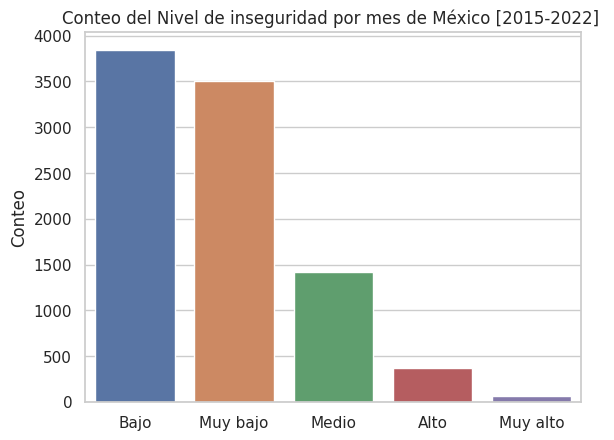

In [ ]:
ax = sns.barplot(x=conteo.index,y=conteo,order=conteo.index)
ax.set_title('Conteo del Nivel de inseguridad por mes de México [2015-2022] ')
ax.set(ylabel='Conteo');

### Tabla de contingencia

Vamos a evaluar el nivel de inseguridad por entidad de la republica mexicana.

Para ello vamos generar una tabla de contingencia usando las columnas **entidad** y **nivel_inseguridad**. Con esto podemos observar que entidad presento de manera general el mayor riesgo de inseguridad durante el periodo del 2015 al 2022

In [ ]:
tabla_contingencia=pd.crosstab(df_entidades['entidad'], [df_entidades['tipo_de_delito'],df_entidades['nivel_inseguridad']])


In [ ]:
tabla_contingencia.stack(level=1)

tipo_de_delito                    Feminicidio  Homicidio  Lesiones
entidad        nivel_inseguridad                                  
Aguascalientes Alto                       NaN        NaN         0
               Bajo                       NaN       90.0         1
               Medio                      NaN        0.0         0
               Muy alto                   NaN        NaN         0
               Muy bajo                  96.0        6.0        95
...                                       ...        ...       ...
Zacatecas      Alto                       NaN        NaN         0
               Bajo                       NaN       90.0        21
               Medio                      NaN        6.0        75
               Muy alto                   NaN        NaN         0
               Muy bajo                  96.0        0.0         0

[160 rows x 3 columns]

### Subplots

Vamos a graficar los 4 estados que presentan un mayor número de meses con nivel de inseguridad "Muy alto"

In [ ]:
tabla_contingencia_e=pd.crosstab(df_entidades['entidad'],df_entidades['nivel_inseguridad'])
tabla_contingencia_e

nivel_inseguridad                Alto  Bajo  Medio  Muy alto  Muy bajo
entidad                                                               
Aguascalientes                      0    91      0         0       197
Baja California                    51    96     15        30        96
Baja California Sur                37    71     62         0       118
Campeche                            0   154      0        14       120
Chiapas                             0   192      0         0        96
Chihuahua                           8    96     88         0        96
Ciudad de México                    0   129     27         0       132
Coahuila de Zaragoza                6    87     86         0       109
Colima                              9    93     86         0       100
Durango                            39    97     55         0        97
Guanajuato                         24    95     73         0        96
Guerrero                            0   154     30         0       104
Hidalgo                             3   105     82         0        98
Jalisco                             0    98     94         0        96
Michoacán de Ocampo                 0   120     72         0        96
Morelos                            18    97     77         0        96
México                             55    98     26        13        96
Nayarit                             0   161      1         0       126
Nuevo León                         10   105     77         0        96
Oaxaca                              0   105     69         0       114
Puebla                              0   173     18         0        97
Querétaro                          65    96     21        10        96
Quintana Roo                       22   109     53         0       104
San Luis Potosí                     0   123     59         0       106
Sinaloa                             0   166     26         0        96
Sonora                              2   180      9         0        97
Tabasco                            21    99     71         1        96
Tamaulipas                          0   164     28         0        96
Tlaxcala                            0   159      2         0       127
Veracruz de Ignacio de la Llave     0   179      5         0       104
Yucatán                             0    43     29         0       216
Zacatecas                           0   111     81         0        96

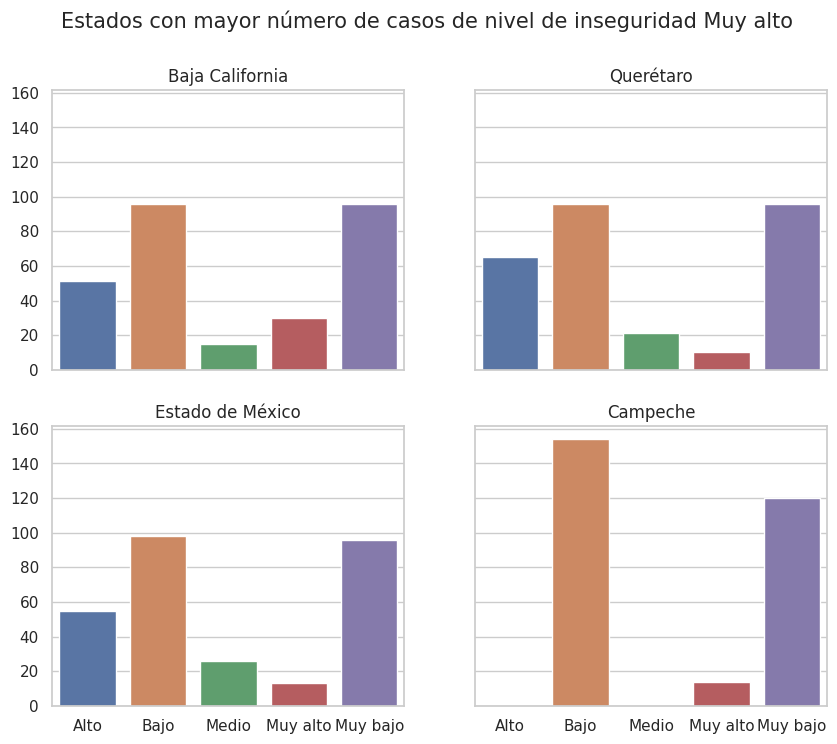

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=tabla_contingencia_e.columns, y=tabla_contingencia_e.loc['Baja California'], ax=axes[0, 0])
sns.barplot(x=tabla_contingencia_e.columns, y=tabla_contingencia_e.loc['Querétaro'], ax=axes[0, 1])
sns.barplot(x=tabla_contingencia_e.columns, y=tabla_contingencia_e.loc['México'], ax=axes[1, 0])
sns.barplot(x=tabla_contingencia_e.columns, y=tabla_contingencia_e.loc['Campeche'], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Baja California')
axes[0, 1].set(xlabel='', ylabel='', title='Querétaro')
axes[1, 0].set(xlabel='', ylabel='', title='Estado de México')
axes[1, 1].set(xlabel='', ylabel='', title='Campeche')

fig.suptitle('Estados con mayor número de casos de nivel de inseguridad Muy alto', fontsize=15);

### Violin plots

In [ ]:
def graficas(df,col_clase,titulo,y_label):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  filtro = (df['tipo_de_delito']==col_clase)
  df.filtrado=df[filtro]
  plt.subplot(1, 2, 1)
  ax1=sns.boxplot(data=df.filtrado, x='sexo', y='delitos_mensuales')
  ax1.set(ylabel=y_label);
  plt.subplot(1, 2, 2)
  ax2=sns.violinplot(data=df.filtrado, x='sexo', y='delitos_mensuales')
  ax2.set(ylabel=y_label);
  plt.suptitle(titulo)
  return ;

def grafica_violin(df,col_clase,titulo,y_label):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  filtro = (df['tipo_de_delito']==col_clase)
  df.filtrado=df[filtro]
  ax=sns.violinplot(data=df.filtrado, x='sexo', y='delitos_mensuales')
  ax.set_title(titulo)
  ax.set(ylabel=y_label);
  return ;

def grafica_boxplot(df,col_clase,titulo,y_label):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  filtro = (df['tipo_de_delito']==col_clase)
  df.filtrado=df[filtro]
  ax=sns.boxplot(data=df.filtrado, x='sexo', y='delitos_mensuales')
  ax.set_title(titulo)
  ax.set(ylabel=y_label);
  return ;


In [ ]:
df_ent=df2.groupby(['año','mes','tipo_de_delito','sexo'], as_index=False).sum()
df3=df2.groupby(['año','mes','bien_jurídico_afectado','tipo_de_delito','sexo'], as_index=False).sum()

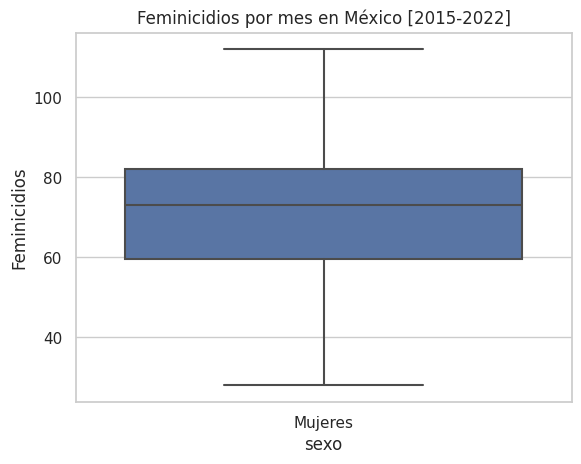

In [ ]:
grafica_boxplot(df_ent,'Feminicidio','Feminicidios por mes en México [2015-2022]','Feminicidios')

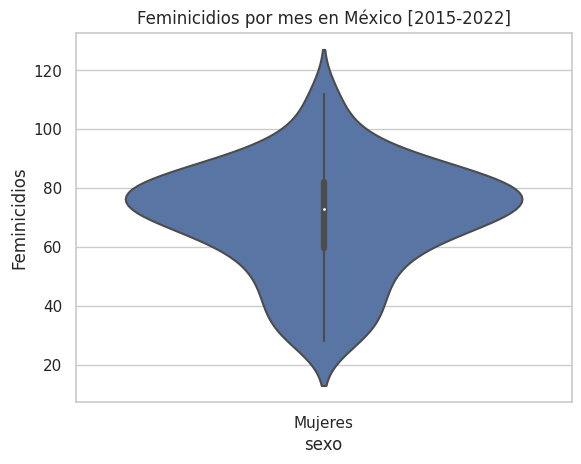

In [ ]:
grafica_violin(df_ent,'Feminicidio','Feminicidios por mes en México [2015-2022]','Feminicidios')

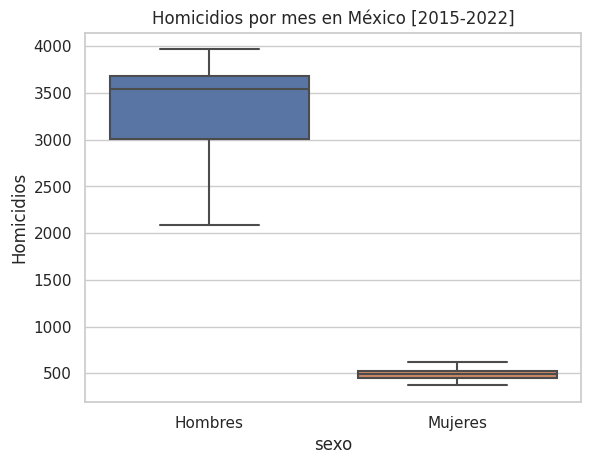

In [ ]:
grafica_boxplot(df_ent,'Homicidio','Homicidios por mes en México [2015-2022]','Homicidios')

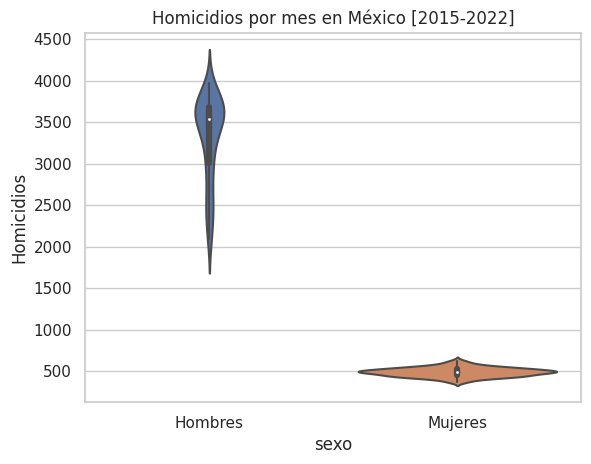

In [ ]:
grafica_violin(df_ent,'Homicidio','Homicidios por mes en México [2015-2022]','Homicidios')

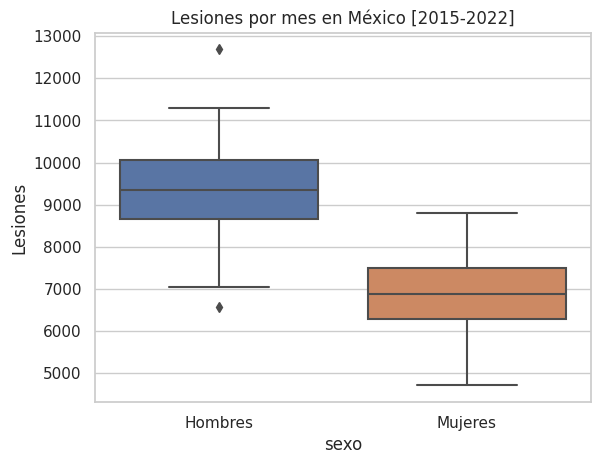

In [ ]:
grafica_boxplot(df_ent,'Lesiones','Lesiones por mes en México [2015-2022]','Lesiones')

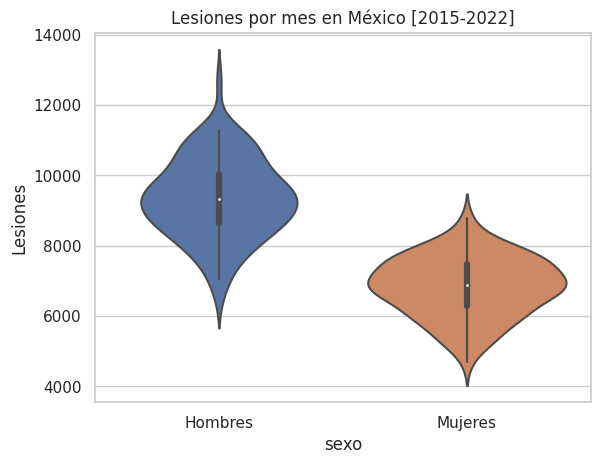

In [ ]:
grafica_violin(df_ent,'Lesiones','Lesiones por mes en México [2015-2022]','Lesiones')

## 4 Correlaciones y Regresión Linear Simple

Para este tema el dataframe no cuenta con sufientes columnas numéricas como para hacer un matriz de correlaciones completa, sin embargo, vamos a realizar un merge de nuestro dataframe con un documento externo que contiene información sobre el porcentaje de pobreza por entidad federativa para los años [2016, 2018, 2020,2022]

1. Cargamos el archivo con los porcentajes de pobreza por entidad
2. Filtramos las información del dataframe para solo quedarnos con los registros de los años que empatan con los porcentajes de pobreza.
3. Seleccionamos solo la columna de delitos anuales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Indicador de pobreza
df_pobreza = pd.read_csv('https://raw.githubusercontent.com/userlalo\
/G20_ProcesamientoDatosPython/main/Porcentaje_numero_personas_carencias_promedio_de_pobreza_por_estado.csv')
#Eliminamos la columna entida del dataframe de pobreza porque los nombres
# de la entidades no son iguales a los de nuestro dataframe original
df_pobreza=df_pobreza.drop(columns=['entidad'])

In [ ]:
# Delitos violentos
df4= pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/delitos_poblacion_tasa.csv')
# Producto interno bruto
df_pib = pd.read_csv("https://raw.githubusercontent.com/userlalo/\
G20_ProcesamientoDatosPython/main/PIBE.csv")
# Indice nacional de precios al cosumidor
df_INPC = pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/INPCmensual.csv", encoding='latin1')

In [ ]:
# Delitos violentos
df4= pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/delitos_poblacion_tasa.csv')

# Preparacion de datos de delitos violentos
def df_struct(datos):
  import pandas as pd
  df=pd.DataFrame() 
  meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio','julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
  for mes in meses:
    datos['mes']=mes
    #datos=datos.rename(columns={mes: 'delitos_mensuales'})
    datosf=datos[['año','mes',mes,'clave_entidad','entidad','población_mujeres','población_hombres','delitos_totales','población_total','tasa']]
    datosf=datosf.rename(columns={mes: 'delitos_mensuales'})
    df=pd.concat([df,datosf])
  return df

df4=df_struct(df4)
df4=df4.reset_index(drop=True)

In [ ]:
# Producto interno bruto
df_pib = pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/PIBE.csv")
df_pib=df_pib[['entidad','2015','2016','2017','2018','2019','2020','2021']]
def df_struct_pib(datos):
  import pandas as pd
  df=pd.DataFrame() 
  años=['2015','2016','2017','2018','2019','2020','2021']
  for año in años:
    datos['año']=año
    datosf=datos[['año','entidad',año]]
    datosf=datosf.rename(columns={año: 'pib'})
    df=pd.concat([df,datosf])
  return df

df_pib=df_struct_pib(df_pib)
df_pib = df_pib.astype({'año':'int64'})
df_pib=df_pib.reset_index(drop=True)

In [ ]:
# Indice nacional de precios al cosumidor
df_INPC = pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/INPCmensual.csv", encoding='latin1')
df_INPC=df_INPC[['año','mes.1','INPC']]
df_INPC=df_INPC[(df_INPC['año']==2021)|(df_INPC['año']==2022)]
df_INPC=df_INPC.rename(columns={'mes.1':'mes'})
df_INPC=df_INPC.reset_index(drop=True)

### Matriz de correlación

Con esto ya tenemos nuestro dataframe para hacer la matriz de correlaciones

Eliminamos las variables categóricas del dataframe para crear la matriz de correlación

In [ ]:
df_correlación=df4.drop(columns=['año','entidad','clave_entidad'])

Obtenemos la matriz de correlación

In [ ]:
df_correlación.corr()

delitos_mensuales  población_mujeres  población_hombres  \
delitos_mensuales           1.000000           0.564547           0.569047   
población_mujeres           0.564547           1.000000           0.999438   
población_hombres           0.569047           0.999438           1.000000   
delitos_totales             0.975387           0.578793           0.583407   
población_total             0.566814           0.999867           0.999852   
tasa                        0.573775          -0.118876          -0.115285   

                   delitos_totales  población_total      tasa  
delitos_mensuales         0.975387         0.566814  0.573775  
población_mujeres         0.578793         0.999867 -0.118876  
población_hombres         0.583407         0.999852 -0.115285  
delitos_totales           1.000000         0.581117  0.588254  
población_total           0.581117         1.000000 -0.117147  
tasa                      0.588254        -0.117147  1.000000

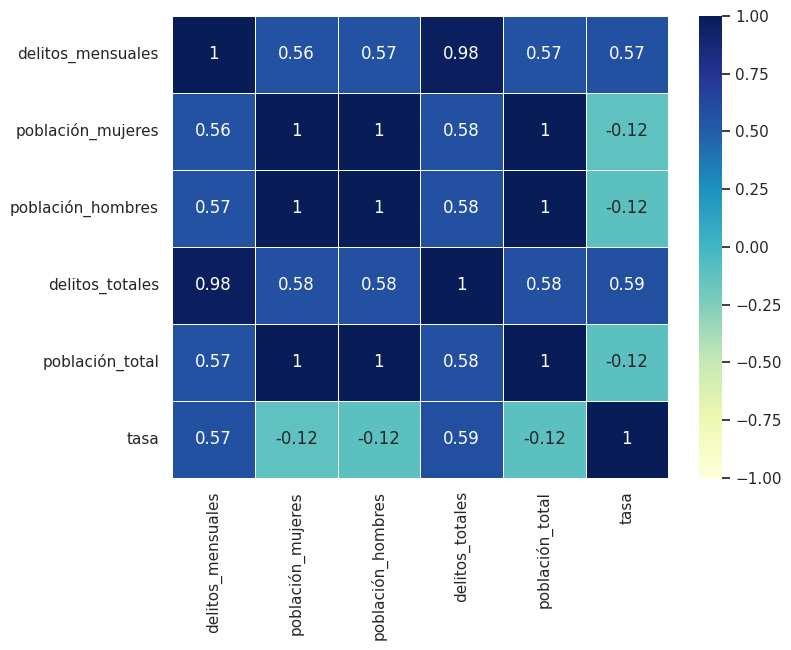

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_correlación.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Se observa que existe una correlación positiva alta entre delitos totales y delitos mensuales de 0.98 que es lógico ya que si aumentan los delitos mensuales debe aumentar los delitos totales. 

### Scatterplot

In [ ]:
def grafica_dispersión(datos,datos_x,datos_y):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.scatterplot(data=datos, x=datos_x, y=datos_y)
  print(f'Coeficiente de correlación: {datos[datos_x].corr(datos[datos_y])}')
  
  return

A continuación se va a tratar de demostrar si existe una relación entre los delitos totales con respecto al PIB y al INPC, para analizar si hay un proporción que demuestre el aumento del PIB con una disminución de los delitos y del efecto de la inflación en los delitos ya que el INPC se utiliza como un indicador para medir el poder adquisitivo de los ingresos de los hogares y si éste fluctúa dramáticamente puede aumentar significativamente los delitos

In [ ]:
# Dataframe que relaciona los delitos violentos totales con el PIB
df4_=df4.groupby(['año','clave_entidad','entidad','población_mujeres', 'población_hombres', 'delitos_totales',
       'población_total'], as_index=False).sum()
df4_df_PIB=pd.merge(df_pib,df4_, how='left',on=['año','entidad'])



In [ ]:
# Dataframe que relaciona los delitos violentos totales con el INPC
df4_b=df4.groupby(['año','mes'], as_index=False).sum()
df4_df_INPC=pd.merge(df_INPC,df4_b, how='left',on=['año','mes'])[['año','mes','INPC','delitos_mensuales']]

Coeficiente de correlación: 0.35199495186099405


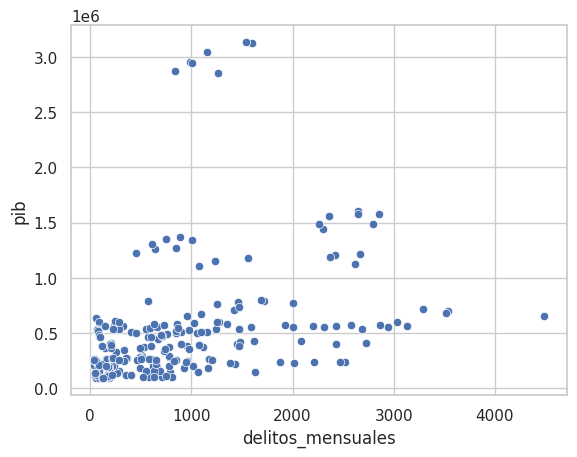

In [ ]:
grafica_dispersión(df4_df_PIB,'delitos_mensuales','pib')

Se observa en la  gráfica anterior la concentración de puntos en la parte baja de los valores tanto del PIB como la de delitos totales, lo que demuestra que existen más delitos cuando el PIB está bajo teniendo una correlación de 0.35

Coeficiente de correlación: -0.14124623263683786


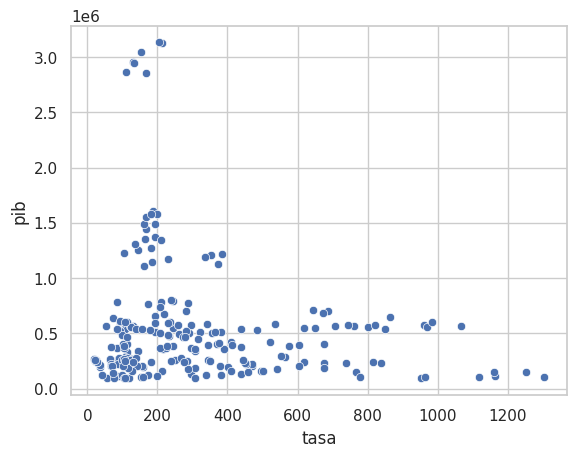

In [ ]:
grafica_dispersión(df4_df_PIB,'tasa','pib')

La gráfica anterior también demuestra que la tasa de delitos disminuye cuando aumenta el PIB

Coeficiente de correlación: -0.5303538151020083


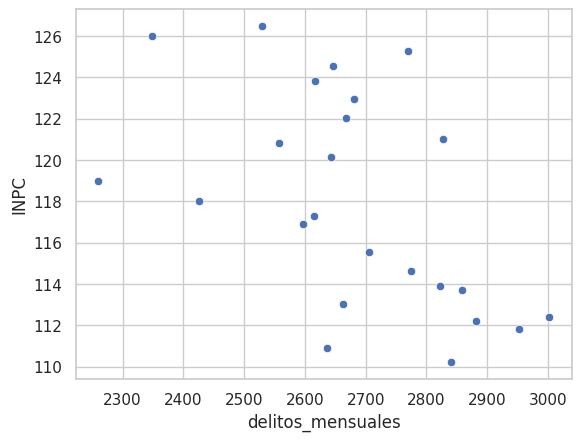

In [ ]:
grafica_dispersión(df4_df_INPC,'delitos_mensuales','INPC')

La gráfica anterior demuestra que los delitos mensuales aumentan cuando la inflación también aumenta

###Pairplots

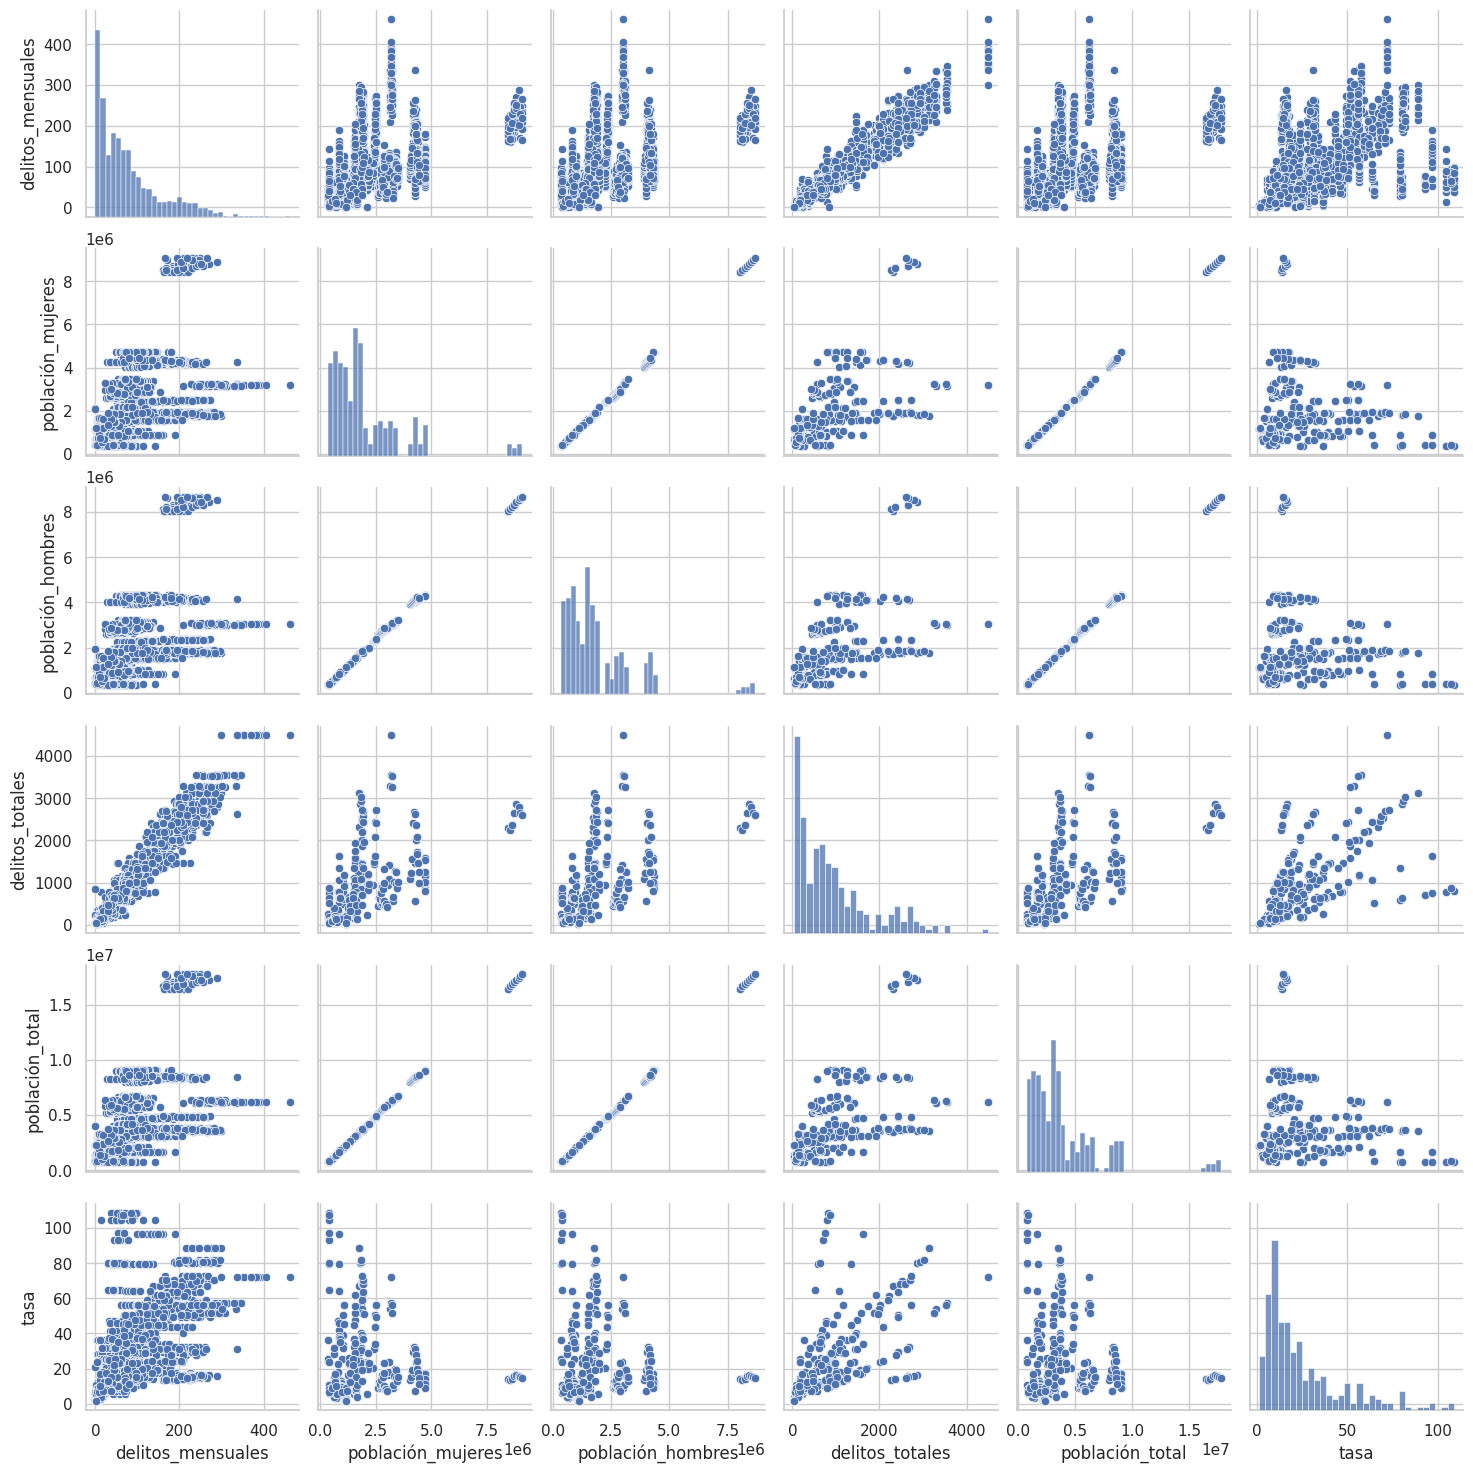

In [ ]:
sns.pairplot(df_correlación);

### Regresión Lineal simple

Análisis de los 2 Dataframes  de los cuales se va a aplicar Regresión Lineal Simple

In [ ]:
#df4_df_PIB Dataframe que relaciona los delitos violentos totales con el PIB
#df4_df_INPC Dataframe que relaciona los delitos violentos totales con el INPC
print(df4_df_PIB.iloc[:6])


    año              entidad         pib  clave_entidad  población_mujeres  \
0  2015       Aguascalientes  198220.641              1             676756   
1  2015      Baja California  511459.528              2            1676450   
2  2015  Baja California Sur  130520.642              3             353175   
3  2015             Campeche  637604.643              4             463786   
4  2015             Coahuila  563928.440              5            1503013   
5  2015               Colima   95878.066              6             363397   

   población_hombres  delitos_totales  población_total  delitos_mensuales  \
0             655069             41.0          1331825               41.0   
1            1681344            899.0          3357794              899.0   
2             366671            177.0           719846              177.0   
3             453046             55.0           916832               55.0   
4            1497543            324.0          3000556              

In [ ]:
print(df4_df_INPC.loc[:6])

    año      mes     INPC  delitos_mensuales
0  2021  febrero  110.907             2636.0
1  2021    marzo  111.824             2953.0
2  2021    abril  112.190             2882.0
3  2021     mayo  112.419             3002.0
4  2021    junio  113.018             2663.0
5  2022    marzo  120.159             2643.0
6  2022    abril  120.809             2558.0


In [ ]:
#Renombradode los Dataframes
df_PIB_DelitosTotales=df4_df_PIB
df_INPC_DelitosMensuales=df4_df_INPC
#Se inicia un proceso de regresión lineal entre el pib y los delitos_totales
df_PIB_DelitosTotales.loc[0:3, ['pib', 'delitos_totales']]

pib  delitos_totales
0  198220.641             41.0
1  511459.528            899.0
2  130520.642            177.0
3  637604.643             55.0

Para el analisis de este dataframe se van a filtrar los datos ya que se observa en la gráfica de dispersión que existen datos atípicos


Coeficiente de correlación: 0.35199495186099405


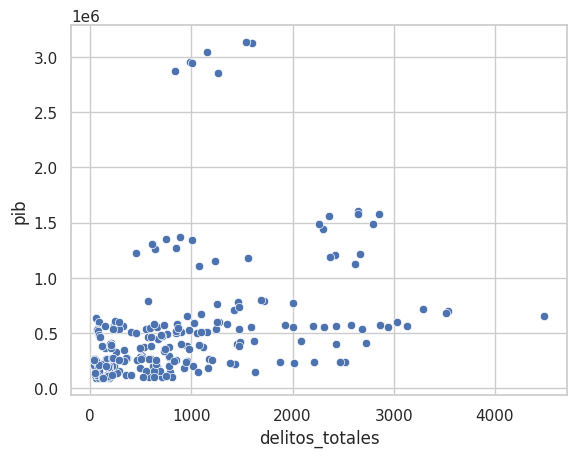

In [ ]:
grafica_dispersión(df_PIB_DelitosTotales,'delitos_totales','pib')

In [ ]:
#se filtran el pib y los delitos totales
df_filtrado_PIB_DelitosTotales=df_PIB_DelitosTotales[['pib','delitos_totales']]
df_filtrado_PIB_DelitosTotales

pib  delitos_totales
0    198220.641             41.0
1    511459.528            899.0
2    130520.642            177.0
3    637604.643             55.0
4    563928.440            324.0
..          ...              ...
219  481559.431            703.0
220   94889.135            124.0
221  767013.242           1249.0
222  259829.011             42.0
223  150781.616           1625.0

[224 rows x 2 columns]

In [ ]:
df_filtrado_PIB_DelitosTotales['pib'].max()

3132839.076

In [ ]:
df_filtrado_PIB_DelitosTotales.isna().sum()
df_filtrado_PIB_DelitosTotales=df_filtrado_PIB_DelitosTotales[df_filtrado_PIB_DelitosTotales>0]

Coeficiente de correlación: 0.35199495186099405


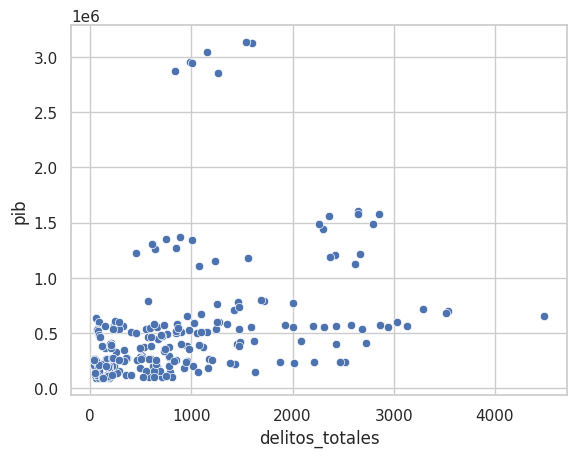

In [ ]:
grafica_dispersión(df_filtrado_PIB_DelitosTotales,'delitos_totales','pib')


Coeficiente de correlación: 0.5173357065387522


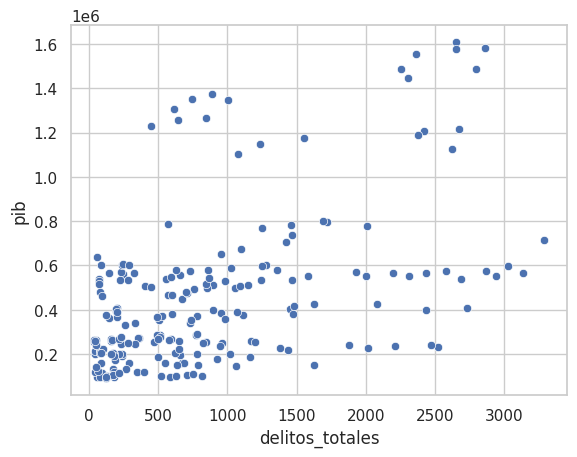

In [ ]:
df_filtrado_PIB_DelitosTotales=df_filtrado_PIB_DelitosTotales[df_filtrado_PIB_DelitosTotales['pib']<2_000_000]
df_filtrado_PIB_DelitosTotales=df_filtrado_PIB_DelitosTotales[df_filtrado_PIB_DelitosTotales['delitos_totales']<3500]
df_filtrado_PIB_DelitosTotales
grafica_dispersión(df_filtrado_PIB_DelitosTotales,'delitos_totales','pib')

Con estas operaciones se han eliminado datos atípicos tanto de delitos totales como de PIB y se procede al entrenamiento y cálculo de la ecuación de la recta que define el modelo

In [ ]:
from sklearn.linear_model import LinearRegression

Proceso de entrenamiento

In [ ]:
regLineal=LinearRegression()
x=df_filtrado_PIB_DelitosTotales['delitos_totales'] #Se define al Delitos totales como la variable X
y=df_filtrado_PIB_DelitosTotales['pib'] #Se define PIB como la variable Y
regLineal.fit(x.to_frame(),y)

LinearRegression()

Se usa el modelo entrenado para realizar la predicción

In [ ]:
y_predict=regLineal.predict(df_filtrado_PIB_DelitosTotales['delitos_totales'].to_frame())

Se grafican los puntos y la línea de predicción

<Axes: xlabel='delitos_totales', ylabel='pib'>

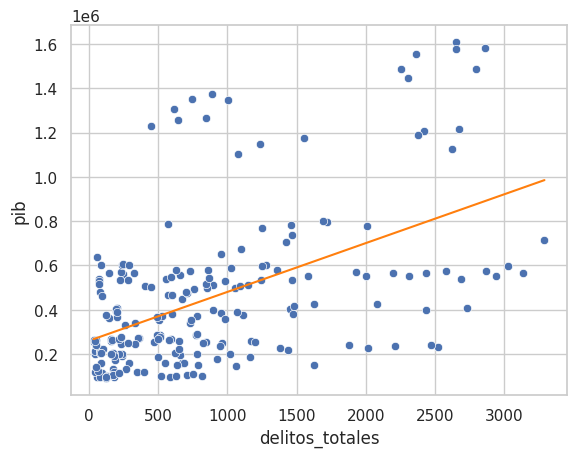

In [ ]:
sns.scatterplot(x='delitos_totales',y='pib',data=df_filtrado_PIB_DelitosTotales)
sns.lineplot(x='delitos_totales',y=y_predict,data=df_filtrado_PIB_DelitosTotales,color='#FF7F0E')

Ahora se obtiene la Ecuación de la línea

In [ ]:
intercept=regLineal.intercept_
coeficiente=regLineal.coef_[0]
print(f'La ecuación de la línea es: y = {coeficiente} X + {intercept}')

La ecuación de la línea es: y = 220.41454192486682 X + 260240.35039040202


Se calcula la efectividad del modelo con el coeficiente de determinación o R2

In [ ]:
regLineal.score(df_filtrado_PIB_DelitosTotales['delitos_totales'].to_frame(),df_filtrado_PIB_DelitosTotales['pib'])

0.2676362332599499

Recordando que: "R2 es una medida estadística que indica la proporción de la variación total de una variable que es explicada por la relación lineal entre dos variables. En otras palabras, el R2 es una medida de cuánto se ajusta un modelo lineal a los datos observados y R2 bajo indica que el modelo no se ajusta bien a los datos.". Por lo tanto, en este ejemplo no se ajustan los datos al modelo.
Se va a realizar un prueba con datos existentes para validar el modelo o la ecuación de la recta

In [ ]:
df_filtrado_PIB_DelitosTotales

pib  delitos_totales
0    198220.641             41.0
1    511459.528            899.0
2    130520.642            177.0
3    637604.643             55.0
4    563928.440            324.0
..          ...              ...
219  481559.431            703.0
220   94889.135            124.0
221  767013.242           1249.0
222  259829.011             42.0
223  150781.616           1625.0

[214 rows x 2 columns]

In [ ]:
#Ecuación de la recta es: y = 0.0012142403623767234 X + 319.6015888706936
print(f'y={0.0012142403623767234}*{563928.440}+{319.6015888706936}')
print(0.0012142403623767234 *563928.44 + 319.6015888706936)

y=0.0012142403623767234*563928.44+319.6015888706936
1004.3462622108339


El modelo predice 1004.34 y el dato real para ese pib es de 324

Ahora se va a realizar el mismo proceso pero para el Dataframe df_INPC_DelitosTotales

Coeficiente de correlación: -0.5303538151020083


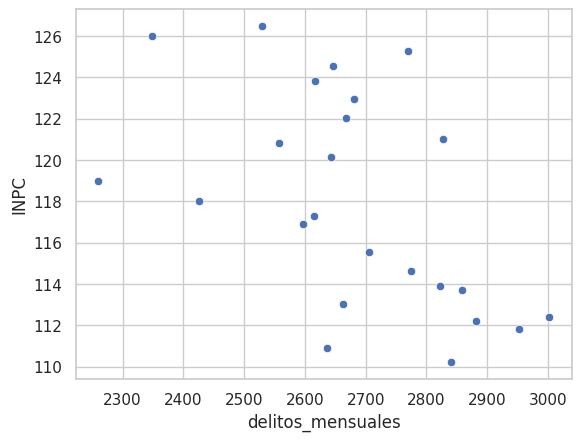

In [ ]:
#Análisis de los datos del INPC vs delitos totales
grafica_dispersión(df_INPC_DelitosMensuales,'delitos_mensuales','INPC')

In [ ]:
#Filtrado de datos
df_filtrado_INPC_DelitosMensuales=df_INPC_DelitosMensuales[['INPC','delitos_mensuales']]
df_filtrado_INPC_DelitosMensuales

INPC  delitos_mensuales
0   110.907             2636.0
1   111.824             2953.0
2   112.190             2882.0
3   112.419             3002.0
4   113.018             2663.0
5   120.159             2643.0
6   120.809             2558.0
7   110.210             2840.0
8   113.682             2859.0
9   113.899             2823.0
10  115.561             2706.0
11  116.884             2597.0
12  114.601             2774.0
13  117.308             2615.0
14  118.002             2426.0
15  118.981             2260.0
16  121.022             2827.0
17  122.044             2667.0
18  122.948             2681.0
19  123.803             2616.0
20  124.571             2646.0
21  125.276             2770.0
22  125.997             2348.0
23  126.478             2529.0

Coeficiente de correlación: -0.5092270127469902


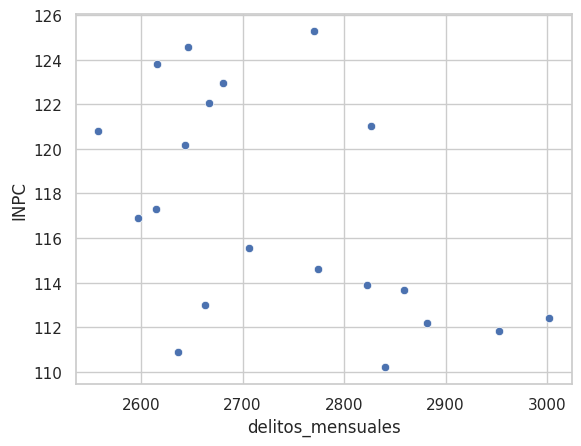

In [ ]:
df_filtrado_INPC_DelitosMensuales=df_filtrado_INPC_DelitosMensuales[df_filtrado_INPC_DelitosMensuales['INPC']<126]
df_filtrado_INPC_DelitosMensuales=df_filtrado_INPC_DelitosMensuales[df_filtrado_INPC_DelitosMensuales['delitos_mensuales']>2500]
grafica_dispersión(df_filtrado_INPC_DelitosMensuales,'delitos_mensuales','INPC')

In [ ]:
regLinealINPC=LinearRegression()
x=df_filtrado_INPC_DelitosMensuales['delitos_mensuales']
y=df_filtrado_INPC_DelitosMensuales['INPC']
modelo1=regLinealINPC.fit(x.to_frame(),y)
modelo1

LinearRegression()

Otra forma de calcular el modelo

In [ ]:
import statsmodels.api as sm
modelo2 = sm.OLS(y, x).fit()
print(modelo2.summary())
#y_predict=regLinealINPC.predict(df_filtrado_INPC_DelitosMensuales['INPC'].to_frame())


                                 OLS Regression Results                                
Dep. Variable:                   INPC   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3355.
Date:                Mon, 08 May 2023   Prob (F-statistic):                    7.74e-23
Time:                        23:54:51   Log-Likelihood:                         -71.872
No. Observations:                  20   AIC:                                      145.7
Df Residuals:                      19   BIC:                                      146.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
coeficientes = modelo2.params
coeficientes

delitos_mensuales    0.042663
dtype: float64

In [ ]:
y_pred = modelo2.predict(df_filtrado_INPC_DelitosMensuales['INPC'].to_frame())
y_pred

0     4.731675
1     4.770798
2     4.786412
3     4.796182
4     4.821738
5     5.126397
6     5.154129
7     4.701939
8     4.850066
9     4.859324
10    4.930231
11    4.986675
12    4.889274
13    5.004764
16    5.163216
17    5.206818
18    5.245386
19    5.281863
20    5.314629
21    5.344706
dtype: float64

<Axes: xlabel='delitos_mensuales', ylabel='INPC'>

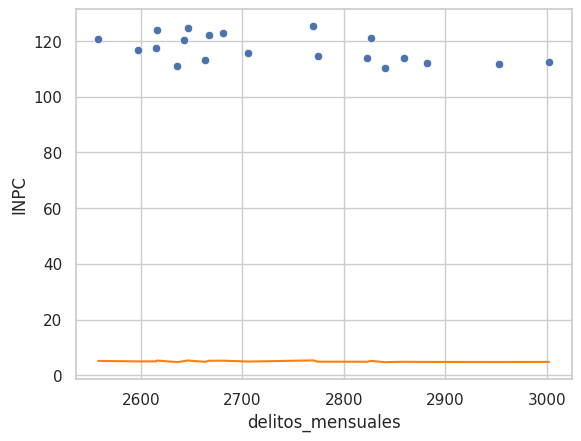

In [ ]:
sns.scatterplot(x='delitos_mensuales',y='INPC',data=df_filtrado_INPC_DelitosMensuales)
sns.lineplot(x='delitos_mensuales',y=y_pred,data=df_filtrado_INPC_DelitosMensuales,color='#FF7F0E')

In [ ]:
intercept=regLinealINPC.intercept_
coeficiente=regLinealINPC.coef_[0]
print(f'La ecuación de la línea es: y = {coeficiente} X + {intercept}')

La ecuación de la línea es: y = -0.020048040742203753 X + 172.04628074807965


In [ ]:
regLinealINPC.score(df_filtrado_INPC_DelitosMensuales['delitos_mensuales'].to_frame(),df_filtrado_INPC_DelitosMensuales['INPC'])

0.259312150511224

## 5 Distribuciones muestrales y técnicas de evaluación de modelos

### Muestreo aleatorio o randomizado

Para este tema se va utilizar un dataframe que contiene los delitos mensuales cuya afectación es hacia las mujeres

In [ ]:
df_DatosDelitosMujeres=df2_distribuciones_m
df_DatosDelitosMujeres

año         mes  delitos_mensuales            bien_jurídico_afectado  \
0    2015       abril                 36  La vida y la Integridad corporal   
2    2015       abril                393  La vida y la Integridad corporal   
4    2015       abril               7716  La vida y la Integridad corporal   
5    2015      agosto                 40  La vida y la Integridad corporal   
7    2015      agosto                419  La vida y la Integridad corporal   
..    ...         ...                ...                               ...   
472  2022     octubre                579  La vida y la Integridad corporal   
474  2022     octubre               7828  La vida y la Integridad corporal   
475  2022  septiembre                 82  La vida y la Integridad corporal   
477  2022  septiembre                517  La vida y la Integridad corporal   
479  2022  septiembre               7734  La vida y la Integridad corporal   

    tipo_de_delito     sexo  
0      Feminicidio  Mujeres  
2        Homicidio  Mujeres  
4         Lesiones  Mujeres  
5      Feminicidio  Mujeres  
7        Homicidio  Mujeres  
..             ...      ...  
472      Homicidio  Mujeres  
474       Lesiones  Mujeres  
475    Feminicidio  Mujeres  
477      Homicidio  Mujeres  
479       Lesiones  Mujeres  

[288 rows x 6 columns]

In [ ]:
tamanio_muestra = len(df_DatosDelitosMujeres)
tamanio_muestra

288

Muestreo aleatorio sin reposición

In [ ]:
df_DatosDelitosMujeres['delitos_mensuales'].sample(n=20,replace=False)

390      86
34     7836
275      81
285      81
214    7126
339    6984
362     510
89     5324
412     539
310      84
159    6496
382     449
334    5651
102     444
239    6668
120      62
220      64
179    6637
194    6004
387     473
Name: delitos_mensuales, dtype: int64

Muestreo aleatorio con reposición

In [ ]:
df_DatosDelitosMujeres['delitos_mensuales'].sample(frac=0.1,replace=True)

172     464
370      82
69     5263
7       419
282     574
4      7716
442     449
237     476
125      70
437     542
105      63
285      81
347     475
114    7314
260      70
419    6413
217     525
4      7716
347     475
24     6620
472     579
324    6887
185      65
334    5651
467     551
230      85
479    7734
244    7230
109    6539
Name: delitos_mensuales, dtype: int64

### Bootstrap

La idea detrás del bootstrap es crear múltiples muestras de datos a partir de la muestra original mediante muestreo con reemplazo, lo que significa que un mismo dato puede aparecer varias veces en una misma muestra. Luego se calcula la estadística de interés para cada muestra y se utiliza la distribución de estas estadísticas para estimar la distribución de la estadística en la población original.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_DatosDelitosMujeres=df_DatosDelitosMujeres['delitos_mensuales']
#means=[]
estadisticas=[]
num_muestras = 10_000
for i in range(10_000):
  muestra=df_DatosDelitosMujeres.sample(n=50, replace=True)
  estadisticas.append(muestra.mean())
serie_estadistica=pd.Series(estadisticas)

In [ ]:
# Calcular el intervalo de confianza del 95%
limite_inferior = np.percentile(estadisticas, 2.5)
limite_superior = np.percentile(estadisticas, 97.5)

In [ ]:
print('Los delitos mensuales en contra de las mujeres está entre {:.2f} y {:.2f}.'.format(limite_inferior, limite_superior))

Los delitos mensuales en contra de las mujeres está entre 1629.90 y 3347.38.


Con el conjunto de datos del Dataframe no tomó mucho tiempo por lo tanto el número de 100,000 es adecuado

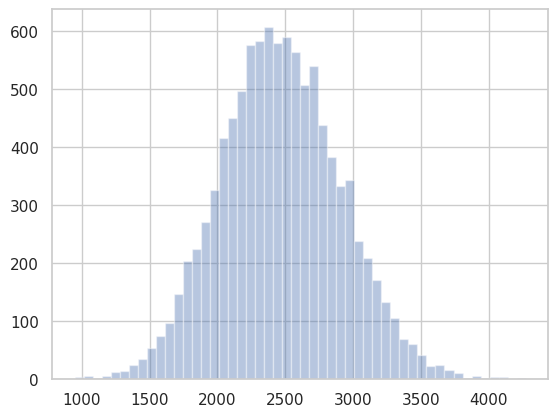

In [ ]:
sns.distplot(serie_estadistica,kde=False,norm_hist=False);

Teorema del límite central
Establece que las distribuciones muestrales de estadística van a tender hacia la normalidad. En este ejemplo de datos de delitos mensuales en contra de las mujeres se puede calcular que tan cerca de la normalidad están los promedios muestrales

In [ ]:
serie_estadistica.skew()

0.1166484114970815

In [ ]:
serie_estadistica.kurtosis()

-0.009226271155763133

Obtención del error estándar. Este error es la desviación estándar de la serie de medidas estadísticas

In [ ]:
print(f'Valor mínimo={serie_estadistica.min()}')
print(f'Valor máximo={serie_estadistica.max()}')
print(f'Media={serie_estadistica.mean()}')
print(f'Media={serie_estadistica.median()}')
print(f'Rango={serie_estadistica.max()-serie_estadistica.min()}')

Valor mínimo=947.62
Valor máximo=4273.44
Media=2466.1895419999996
Media=2454.55
Rango=3325.8199999999997


In [ ]:
print(f'Error estándar= {serie_estadistica.std()}')

Error estándar= 440.893047118516


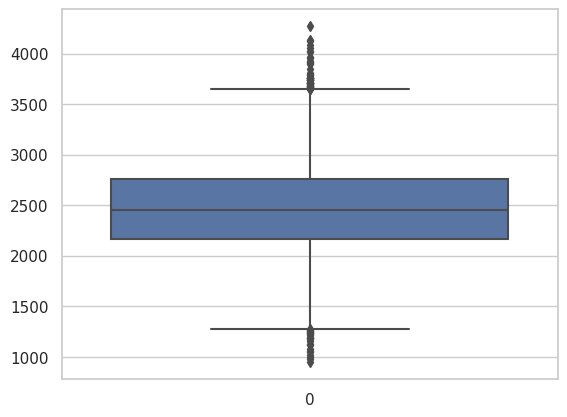

In [ ]:
sns.boxplot(serie_estadistica);

### Intervalos de confianza.

Contexto: 

Los intervalos de confianza son un tipo de estimación estadística que indica el rango de valores en el que se espera que se encuentre un parámetro poblacional desconocido con un cierto nivel de confianza.

Por ejemplo, si se quiere estimar la media poblacional de una variable numérica, se puede obtener una muestra aleatoria de la población y calcular la media muestral. Sin embargo, la media muestral puede variar de una muestra a otra, por lo que es importante tener una idea de la precisión de la estimación. Un intervalo de confianza proporciona esta información al indicar un rango de valores en el que se espera que se encuentre la media poblacional con cierta probabilidad.

El nivel de confianza suele expresarse en términos de un porcentaje, como el 95% o el 99%. Por ejemplo, un intervalo de confianza del 95% indica que si se repitiera el proceso de muestreo y estimación muchas veces, se espera que el 95% de los intervalos de confianza obtenidos contengan el verdadero valor del parámetro poblacional desconocido.


Obtención de los intervalos de confianza

In [ ]:
limite_inferior=serie_estadistica.quantile(0.025)
limite_superior=serie_estadistica.quantile(0.975)

In [ ]:
print(f'Intervalo del 95% de confianza de la media={limite_inferior}<{df_DatosDelitosMujeres.mean()}<{limite_superior}')

Intervalo del 95% de confianza de la media=1629.8990000000001<2465.4166666666665<3347.3810000000003


In [ ]:
intervaloConfianzaMedia=((df_DatosDelitosMujeres.mean()-limite_inferior)+(limite_superior-df_DatosDelitosMujeres.mean()))/2
print(f'Intervalo del 95% de confianza de la media={df_DatosDelitosMujeres.mean()}+/-{intervaloConfianzaMedia}')

Intervalo del 95% de confianza de la media=2465.4166666666665+/-858.7410000000001


visualización de los límites

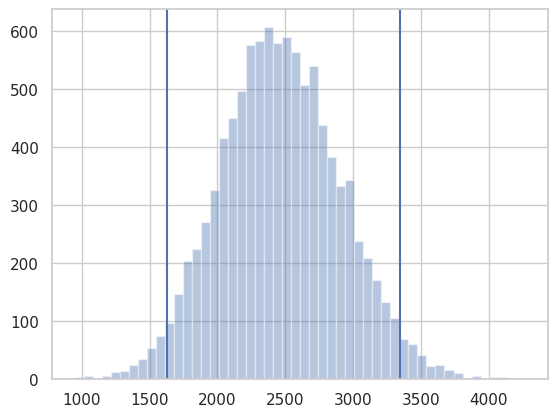

In [ ]:
sns.distplot(serie_estadistica,kde=False,norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior)

Dataset de entrenamiento y prueba

Regresión lineal múltiple

Para este ejemplo se va a utilizar nuevamente el DataFrame de df_correlacion

In [ ]:
df_DelitosTotales=df_correlación
df_DelitosTotales

mes  delitos_mensuales  población_mujeres  población_hombres  \
0         enero                7.0             676756             655069   
1         enero               52.0            1676450            1681344   
2         enero               17.0             353175             366671   
3         enero                3.0             463786             453046   
4         enero               62.0            1503013            1497543   
...         ...                ...                ...                ...   
3067  diciembre               31.0            1875553            1832455   
3068  diciembre               11.0             723158             687586   
3069  diciembre               80.0            4446046            4188253   
3070  diciembre                2.0            1172906            1135464   
3071  diciembre              118.0             859743             829337   

      delitos_totales  población_total       tasa  
0                41.0          1331825   3.078483  
1               899.0          3357794  26.773530  
2               177.0           719846  24.588593  
3                55.0           916832   5.998918  
4               324.0          3000556  10.797999  
...               ...              ...        ...  
3067            472.0          3708008  12.729207  
3068            143.0          1410744  10.136495  
3069            984.0          8634299  11.396409  
3070             39.0          2308370   1.689504  
3071           1340.0          1689080  79.333128  

[3072 rows x 7 columns]

<Axes: >

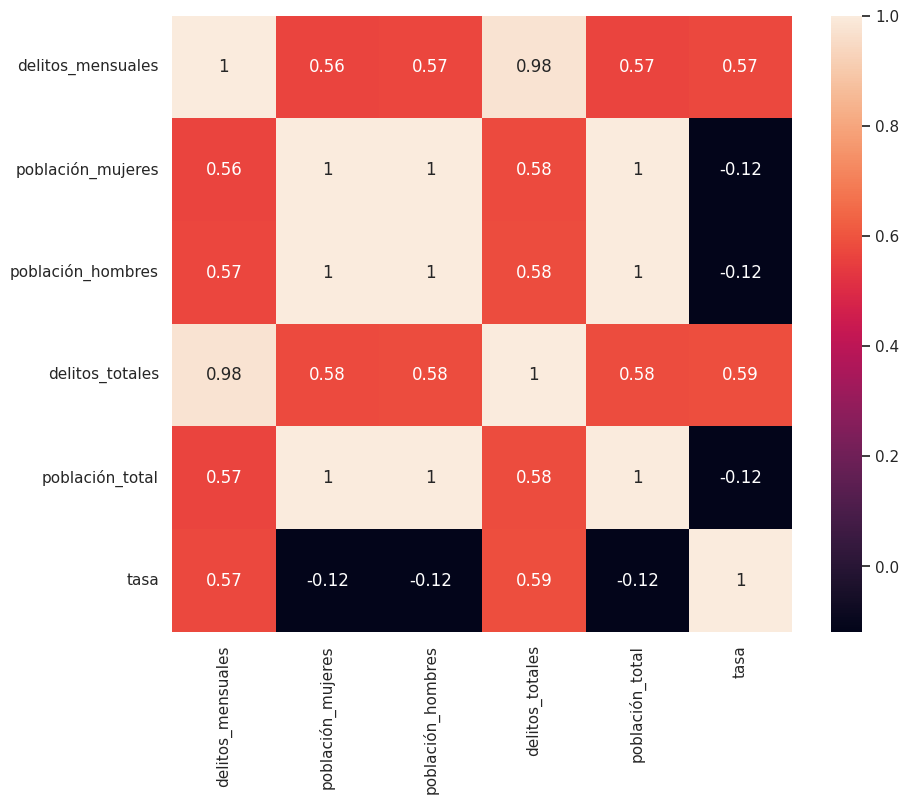

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_DelitosTotales.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

Se va a dividir el dataset en dos. Entrenando un modelo para intentar predecir la tasa de delitos en un mes utilizando los campos de población_mujeres y población_hombres

In [ ]:
x=df_DelitosTotales[['población_hombres','población_mujeres']]
y=df_DelitosTotales['tasa']

In [ ]:
x_entrenamiento,x_prueba,y_entrenamiento,y_prueba=train_test_split(x,y,test_size=0.3,shuffle=True) # Con un tamaño del dataset de prueba del 30%

In [ ]:
regLineal=LinearRegression()
regLineal.fit(x_entrenamiento,y_entrenamiento)

LinearRegression()

In [ ]:
regLineal.score(x_prueba,y_prueba)

0.015523365648492105

Considerando que:

"En una regresión lineal múltiple en Python Pandas, el método .score() se utiliza para calcular el coeficiente de determinación, o R^2, que es una medida de la cantidad de variabilidad en los datos de la variable dependiente que es explicada por el modelo de regresión lineal múltiple.

El método .score() devuelve el valor R^2 del modelo, que es un número entre 0 y 1. Un valor cercano a 0 significa que el modelo no explica bien la variabilidad en los datos, mientras que un valor cercano a 1 significa que el modelo explica bien la variabilidad en los datos."

Por lo tanto, con el resultado de 0.013 el modelo NO explica bien la variabilidad de los datos

### Validación cruzada de K-iteraciones

Contexto:

"La validación cruzada de k-iteraciones (k-fold cross-validation en inglés) es una técnica de validación de modelos en la que se divide el conjunto de datos en k subconjuntos (o "pliegues") del mismo tamaño aproximado.

Luego, se utiliza uno de los pliegues como conjunto de prueba y los otros k-1 pliegues como conjunto de entrenamiento para ajustar el modelo. Este proceso se repite k veces, de manera que cada uno de los k pliegues se utiliza una vez como conjunto de prueba y los otros k-1 como conjunto de entrenamiento.

Al final de las k iteraciones, se obtienen k medidas de desempeño del modelo (por ejemplo, la precisión o el error cuadrático medio), una para cada pliegue de prueba. Estas medidas se promedian para obtener una medida general de desempeño del modelo.

La validación cruzada de k-iteraciones es una técnica útil para evaluar el desempeño de un modelo y reducir el riesgo de sobreajuste (overfitting) a los datos de entrenamiento. Además, permite utilizar todo el conjunto de datos para entrenar y evaluar el modelo, lo que puede ser útil cuando el conjunto de datos es pequeño."

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
puntuaciones=cross_validate(regLineal,x,y,scoring='r2')
puntuaciones

{'fit_time': array([0.00393152, 0.00359392, 0.00565553, 0.00267982, 0.00290895]),
 'score_time': array([0.00163078, 0.0033021 , 0.00158405, 0.00142717, 0.00166011]),
 'test_score': array([0.02436062, 0.02364985, 0.02395724, 0.02534742, 0.02539194])}

"El test_score, que representa el puntaje del modelo en cada iteración del conjunto de prueba.

El test_score es un valor numérico que representa la medida de desempeño del modelo en el conjunto de prueba en cada iteración de la validación cruzada. El valor del test_score se puede interpretar como la precisión, el error cuadrático medio, el coeficiente R cuadrado o cualquier otra métrica de evaluación que se haya seleccionado al definir el objeto del estimador.

El test_score se utiliza para evaluar la capacidad del modelo para generalizar a nuevos datos que no se utilizaron para entrenar el modelo. En general, se espera que el test_score sea similar al train_score (el puntaje del modelo en el conjunto de entrenamiento), ya que el modelo debería ser capaz de aprender los patrones importantes en los datos y generalizarlos a nuevos datos. Si el test_score es mucho peor que el train_score, puede ser una indicación de que el modelo está sobreajustando (overfitting) a los datos de entrenamiento y no es capaz de generalizar bien a nuevos datos."

Se obtiene la evaluación del modelo usando el promedio y la desviación estándar de las puntuaciones obtenidas

In [ ]:
print(f'Puntuación del modelo:{puntuaciones["test_score"].mean():.3f} +/- {puntuaciones["test_score"].std():.3f}')

Puntuación del modelo:0.025 +/- 0.001


"Para evaluar el rendimiento de un modelo en la validación cruzada, se recomienda comparar el promedio del test_score con la desviación estándar. Si el promedio del test_score es alto y la desviación estándar es baja, significa que el modelo tiene un buen desempeño en general y es consistente en todas las iteraciones de la validación cruzada. Si el promedio del test_score es alto pero la desviación estándar es alta, significa que el modelo tiene un buen desempeño en general, pero su desempeño puede variar en diferentes iteraciones de la validación cruzada. Si el promedio del test_score es bajo y la desviación estándar es alta, significa que el modelo tiene un desempeño pobre en general y su desempeño puede variar significativamente en diferentes iteraciones de la validación cruzada."

## 6 Visualización de Datos Avanzada

*   Scatterplot por Categorias
*   Tree map
*   Choropleth Map


###Scatterplot por Categorias




####Importar Librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

####Lectura DF desde GitHub

*   Filtrar
*   Renombrar
*   Merge
*   Columnas nuevas (agregaciones)

In [ ]:
dfs = pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/df_tree_delitos.csv')
dfs_ready=pd.DataFrame(dfs.groupby(['año', 'entidad', 'sexo_victima'], as_index=False).sum())
dfs_ready.head()

año          entidad     sexo_victima  Unnamed: 0  clave_entidad  enero  \
0  2015   Aguascalientes           Hombre           0              1      7   
1  2015   Aguascalientes            Mujer           1              1      0   
2  2015   Aguascalientes  No identificado           2              1      0   
3  2015  Baja California           Hombre           3              2     45   
4  2015  Baja California            Mujer           4              2      7   

   febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  octubre  \
0      1.0    3.0    4.0   2.0    2.0    2.0     2.0         4.0      2.0   
1      0.0    1.0    0.0   2.0    2.0    1.0     1.0         0.0      0.0   
2      0.0    0.0    0.0   0.0    0.0    0.0     0.0         0.0      0.0   
3     50.0   51.0   56.0  78.0   73.0   65.0    79.0        80.0     70.0   
4      8.0    5.0   10.0   4.0   10.0   13.0     8.0        11.0      8.0   

   noviembre  diciembre  delitos_totales  
0        3.0        2.0             34.0  
1        0.0        0.0              7.0  
2        0.0        0.0              0.0  
3       72.0       66.0            785.0  
4       13.0        7.0            104.0

#### Scatterplot por Categorias (Delitos anuales por entidad)

<Axes: xlabel='año', ylabel='delitos_totales'>

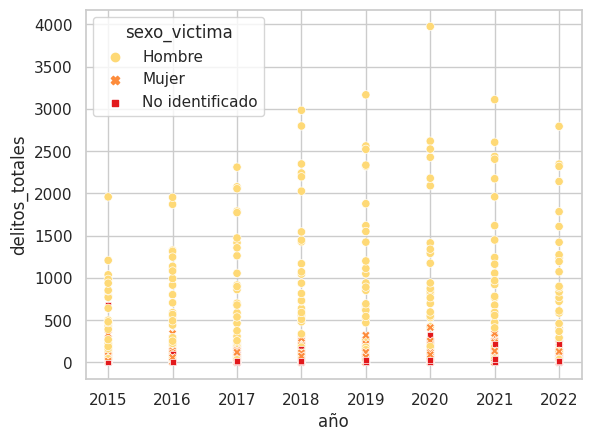

In [ ]:
sns.scatterplot(data= dfs_ready, x= dfs_ready['año'], y=dfs_ready['delitos_totales'], hue=dfs_ready['sexo_victima'], style= dfs['sexo_victima'], palette='YlOrRd')


###Tree Map

####Importar Librerias

In [ ]:
import plotly.express as px
import pandas as pd


####Lectura DF desde GitHub

*   Filtrar
*   Renombrar
*   Merge
*   Columnas nuevas (agregaciones)



In [ ]:
df1= pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/IDVFC_NM_ene2023.csv", encoding='latin1')
df1 = df1[(df1['Año'] >= 2015) & (df1['Año'] <= 2022)]
df1_homicidio_doloso = df1[df1["Subtipo de delito"] == "Homicidio doloso"] 
df1_robo_violencia = df1[(df1["Tipo de delito"] == "Robo") & (df1["Modalidad"] == "Con violencia")] 
from numpy.core.multiarray import concatenate
df1_delitos_violentos =  pd.concat([df1_homicidio_doloso,df1_robo_violencia])
df1_column_name_delitos = {
    'Año': 'año',
    'Clave_Ent':'clave_entidad', 
    'Entidad':'entidad',
    'Bien jurídico afectado':'bien_jurídico_afectado', 
    'Tipo de delito':'tipo_de_delito', 
    'Subtipo de delito':'subtipo_de_delito',
    'Modalidad':'modalidad', 
    'Sexo' : 'sexo_victima' ,
    'Rango de edad':'rango_de_edad',
    'Enero':'enero',
    'Febrero':'febrero', 
    'Marzo':'marzo', 
    'Abril':'abril', 
    'Mayo':'mayo', 
    'Junio':'junio',
    'Julio':'julio', 
    'Agosto':'agosto', 
    'Septiembre':'septiembre', 
    'Octubre':'octubre', 
    'Noviembre':'noviembre',
    'Diciembre':'diciembre'
}
df1_renamed=df1_delitos_violentos.rename(columns=df1_column_name_delitos)
df1_ready=pd.DataFrame(df1_renamed.groupby(['año', 'clave_entidad', 'entidad', 'sexo_victima'], as_index=False).sum())
meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio','julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
df1_ready["delitos_totales"]=df1_ready[meses].sum(axis=1)
df_tree = df1_ready.copy()

####Tree Map Total Delitos Violentos 2015-2022 por entidad y sexo 

In [ ]:
fig = px.treemap(df_tree, path=['entidad', 'sexo_victima'], values='delitos_totales', title = "Total Delitos Violentos 2015 - 2022 por entidad y sexo de las victimas")
fig.show()

####Tree Map Ingresos por municipio (manufactura) 

In [ ]:
municipality= pd.read_csv('https://raw.githubusercontent.com/userlalo/Manufacturing/main/Ingreso-total-segun-municipios-2019.csv')
fig = px.treemap(municipality, path=['State', 'Municipality'], values='Total Income', title = "Ingreso total municipios (manufactura)")
fig.show()

### Choropleth Map
Cambio en tasas delictivas "Delitos Violentos" por entidad entre 2015 y 2022

####Importar Librerias

In [ ]:
import pandas as pd
import folium

####Lectura DF desde GitHub
**Gracias Isaac Arrroyo por el Topo Json

*   Filtrar
*   Renombrar
*   Merge
*   Columnas nuevas (agregaciones)



In [ ]:
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df= pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/delitos_poblacion_tasa.csv')
df15 = df[(df["año"] == 2015)] 
df22 = df[(df["año"] == 2022)] 
df15 = df15[["clave_entidad", "entidad", "tasa"]]
df22 = df22[["clave_entidad", "entidad", "tasa"]]
df15= df15.rename (columns = {"tasa": "tasa_2015"})
df22= df22.rename (columns = {"tasa": "tasa_2022"})
dfchange=pd.merge(df15, df22, how='outer',on=['clave_entidad', 'entidad'])
dfchange['change'] = (dfchange['tasa_2022'] - dfchange['tasa_2015']) / dfchange["tasa_2015"]
dfchange = dfchange.replace( "Ciudad de México", "Distrito Federal")
dfchange.head()

clave_entidad              entidad  tasa_2015  tasa_2022    change
0              1       Aguascalientes   3.078483   5.367362  0.743509
1              2      Baja California  26.773530  72.855172  1.721164
2              3  Baja California Sur  24.588593   6.808669 -0.723096
3              4             Campeche   5.998918   9.097746  0.516564
4              5             Coahuila  10.797999   4.056648 -0.624315

####Choropleth Map

*   Cambio en tasas Delitos Violentos
*   Ingresos por estado (manufactura)



In [ ]:
map = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Violent Crimes rate',
    data = df,
    columns = ['entidad', 'tasa_2022'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrRd',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Violent crime rates 2022"
).add_to(map)


folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Income usd (manufacturing)',
    data = df,
    columns = ['entidad', 'Income (USD)'],
    key_on = "feature.properties.name",
    fill_color = 'YlGnBu',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Income manufacturing per state"
).add_to(map)

folium.LayerControl().add_to(map)

map

El siguiente dataframe contiene los resultados de una encuesta de opinión de la tutoría.
Se usaron dos grupos de alumnos distintos con diferentes niveles educativos para evaluar la necesidad de implementar  o mejorar los programas de tutoría en la Universidad.
Se registró si cada uno de los alumnos considera a la tutoria como una actividad que beneficia su desempeño academico, si funciona y si la cree la necesaria. 
El test A es la hipótesis alternativa (la aplicada al grupo de alumnos sin tutor), mientras que el test B es la hipótesis nula (al grupo de alumnos con tutor).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df7 = pd.read_csv('https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/cuestionario_alumnos.csv',sep=',')

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14512 entries, 0 to 14511
Data columns (total 9 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Número de serie                                                                      14512 non-null  int64 
 1   Escuela o facultad:                                                                  14512 non-null  object
 2   Edad:                                                                                14512 non-null  int64 
 3   Sexo:                                                                                14512 non-null  object
 4   Tiene tutor                                                                          14512 non-null  object
 5   1.	¿Conoces las actividades de tutoría que se desarrollan en tu Escuela o Facultad?  14512 non-n

## 7 Kmeans



### Librerías

In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
# ----------------------------------------------------------------------------
from sklearn import datasets
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB #Naives Bayes
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
# ---------------------------------------------------------------------------
from sklearn.datasets import make_classification 
#----------------------------------------------------------------------------
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report,
                            roc_curve, auc)

### Funciones

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluacion_algoritmo(y_test, y_pred):
  resultado = confusion_matrix(y_test, y_pred)
  print(resultado)
  (TN, FP, FN, TP) = resultado.ravel()
  print("True positives: "+str(TP))
  print("True negatives: "+str(TN))
  print("False positives: "+str(FP))
  print("False negative: "+str(FN))

  acc = calcularAccuracy(TP, TN, FP, FN)
  sen = calcularSensibilidad(TP, TN, FP, FN)
  spec = calcularEspecificidad(TP, TN, FP, FN)
  print("Precision:"+str(acc)+"%")
  print("Sensibilidad:"+str(sen)+"%")
  print("Especificidad:"+str(spec)+"%")

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación llamadas: Precisión (Precision), Exactitud (Accuracy), Sensibilidad (Recall / Sensitivity) y Especificidad (Specificity). Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿Cuántas de ésas eran en realidad positivas?
`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿Cuántas fueron clasificadas correctamente?
`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿Cuántas fueron clasificadas correctamente como positivas?
`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿Cuántas fueron clasificadas correctamente como negativas?
`especificidad = VN / (VN + FP)`

En donde:
VP es el número de verdaderos positivos (elementos que fueron clasificados como positivos y que en realidad son positivos).

FN es el número de falsos negativos (elementos que fueron clasificados como negativos pero que en realidad son positivos).

FP es el número de falsos positivos (elementos que fueron clasificados como positivos pero que en realidad son negativos).

VN es el número de verdaderos negativos (elementos que fueron clasificados como negativos y que en realidad son negativos).

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

###Lectura DF desde GitHub

*   Filtrar
*   Renombrar
*   Merge
*   Columnas nuevas (agregaciones)



In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/IDVFC_NM_ene2023.csv", encoding='latin1')
df1_column_name_delitos = {
    'Año': 'año',
    'Clave_Ent':'clave_entidad', 
    'Entidad':'entidad',
    'Bien jurídico afectado':'bien_jurídico_afectado', 
    'Tipo de delito':'tipo_de_delito', 
    'Subtipo de delito':'subtipo_de_delito',
    'Modalidad':'modalidad', 
    'Sexo' : 'sexo_victima' ,
    'Rango de edad':'rango_de_edad',
    'Enero':'enero',
    'Febrero':'febrero', 
    'Marzo':'marzo', 
    'Abril':'abril', 
    'Mayo':'mayo', 
    'Junio':'junio',
    'Julio':'julio', 
    'Agosto':'agosto', 
    'Septiembre':'septiembre', 
    'Octubre':'octubre', 
    'Noviembre':'noviembre',
    'Diciembre':'diciembre'
}
df=df.rename(columns=df1_column_name_delitos)
df_ready=pd.DataFrame(df.groupby(['año','clave_entidad', 'entidad' ,'tipo_de_delito'], as_index=False).sum())
meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio','julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
df_ready["delitos_totales"]=df_ready[meses].sum(axis=1)
df_ready= df_ready.replace( "Otros delitos que atentan contra la libertad personal", "Libertad Personal")
df_ready= df_ready.replace( "Otros delitos que atentan contra la vida y la integridad corporal", "Contra la vida")
df_ready = df_ready[["año","clave_entidad", "entidad", "tipo_de_delito", "delitos_totales"]]
df_kmean = df_ready.copy()
df_total=pd.DataFrame(df_kmean.groupby(['año','tipo_de_delito'], as_index=False).sum())
df_total= df_total[['año','tipo_de_delito', 'delitos_totales']]
df_total= df_total.sort_values(by='año', ascending=True)
df_total.head()



<ipython-input-6-a606e8159438>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ready=pd.DataFrame(df.groupby(['año','clave_entidad', 'entidad' ,'tipo_de_delito'], as_index=False).sum())
<ipython-input-6-a606e8159438>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total=pd.DataFrame(df_kmean.groupby(['año','tipo_de_delito'], as_index=False).sum())


año                    tipo_de_delito  delitos_totales
0   2015                            Aborto            549.0
12  2015                Tráfico de menores            102.0
11  2015                 Trata de personas           1171.0
10  2015                         Secuestro           1312.0
8   2015  Otros delitos contra la sociedad           2676.0

In [ ]:
dflesiones = df_kmean[(df_kmean["tipo_de_delito"] == "Lesiones")] 
dfhomicidio =df_kmean[(df_kmean["tipo_de_delito"] == "Homicidio")] 
dflibertad = df_kmean[(df_kmean["tipo_de_delito"] == "Libertad Personal")] 
dfvida = df_kmean[(df_kmean["tipo_de_delito"] == "Contra la vida")]
dfextorsion = df_kmean[(df_kmean["tipo_de_delito"] == "Extorsión")]  
df=pd.merge(dflesiones, dfhomicidio, how='outer',on=['año','clave_entidad', 'entidad'])
df= df.rename (columns = {"delitos_totales_x": "Lesiones", "delitos_totales_y": "Homicidio"})
df = pd.merge(df, dflibertad, how='outer',on=['año','clave_entidad', 'entidad'])
df= df.rename (columns = {"delitos_totales": "Libertad Personal"})

df = pd.merge(df, dfvida, how='outer',on=['año','clave_entidad', 'entidad'])
df= df.rename (columns = {"delitos_totales": "Contra la Vida"})
df = pd.merge(df, dfextorsion, how='outer',on=['año','clave_entidad', 'entidad'])
df= df.rename (columns = {"delitos_totales": "Extorsion"})

df= df[["año","clave_entidad", "entidad", "Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion"  ]]
df.head()

<ipython-input-7-0e8cb47f9e03>:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tipo_de_delito_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, dfvida, how='outer',on=['año','clave_entidad', 'entidad'])


año  clave_entidad               entidad  Lesiones  Homicidio  \
0  2015              1        Aguascalientes    3429.0      229.0   
1  2015              2       Baja California   16251.0     1338.0   
2  2015              3   Baja California Sur    1588.0      228.0   
3  2015              4              Campeche     265.0      141.0   
4  2015              5  Coahuila de Zaragoza    6077.0      624.0   

   Libertad Personal  Contra la Vida  Extorsion  
0               61.0            70.0       42.0  
1              841.0           222.0      224.0  
2               37.0             4.0       49.0  
3               11.0            10.0       34.0  
4               17.0            12.0       36.0

### Kmeans Cluster  (No Supervisado) Delitos por estado


####K-means

Vamos a crear 5 cluster para identificar la calisifación de  estados de la Republica mexicana según el tipo de delito y su índice delctivo:
* Lesiones
* Homicidio
* Libertad personal
* Contra la vida
* Extorsión

Para esto vamos a usar el método k-means

In [ ]:
df1=df[(df["año"] == 2022)] 

In [ ]:
k_means = KMeans(n_clusters=5, max_iter=10000)

In [ ]:
k_means.fit(df1[['Lesiones', 'Homicidio','Libertad Personal', 'Contra la Vida','Extorsion' ]])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=5)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[ 5040.8125    ,  1098.1875    ,   579.8125    ,   368.6875    ,
          129.9375    ],
       [67805.        ,  4292.        ,  6203.        ,  1342.        ,
         4411.        ],
       [ 9684.66666667,  2496.16666667,  1959.33333333,   924.        ,
          374.66666667],
       [ 1399.71428571,   712.28571429,   220.14285714,   132.14285714,
          129.71428571],
       [14905.5       ,  4176.        ,   533.        ,   826.        ,
          696.5       ]])

Vamos a clasificar los estados de la Republica según la tasa delictiva de cada unos de los tipos de delitos identificados

In [ ]:
clasificaciones = k_means.predict(df1[['Lesiones', 'Homicidio', 'Libertad Personal','Contra la Vida','Extorsion']])
clasificaciones

array([0, 2, 3, 0, 0, 3, 3, 2, 2, 0, 4, 0, 0, 4, 1, 2, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 3, 3], dtype=int32)

In [ ]:
df1['group']= clasificaciones.tolist()
df1= df1[['clave_entidad', 'entidad', 'group']]
df1.head(10)

<ipython-input-13-b9b3bd520ff1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['group']= clasificaciones.tolist()


clave_entidad               entidad  group
224              1        Aguascalientes      0
225              2       Baja California      2
226              3   Baja California Sur      3
227              4              Campeche      0
228              5  Coahuila de Zaragoza      0
229              6                Colima      3
230              7               Chiapas      3
231              8             Chihuahua      2
232              9      Ciudad de México      2
233             10               Durango      0

####Choropleth Clusters Delitos

Una vez que tenmos clasificados los Estados de la República mexicana por el tipo de delito prediminante los gráfiamos en una **mapa cloropeth** para visualizar mejor como quedaron direnciados los cluster's

In [ ]:
import pandas as pd
import folium
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df1 = df1.replace( "Ciudad de México", "Distrito Federal")
df1 = df1.replace( "Coahuila de Zaragoza", "Coahuila")
df1 = df1.replace( "Michoacán de Ocampo", "Michoacán")
df1 = df1.replace( "Veracruz de Ignacio de la Llave", "Veracruz")

In [ ]:
map = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Clusters Delitos',
    data = df1,
    columns = ['entidad', 'group'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrBr',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Clusters Delitos 2022"
).add_to(map)

folium.LayerControl().add_to(map)

map

* **Cluster 0:**
  * **Estados:** Baja California, Chihuahua, Ciudad de México,  Michoacán de Ocampo,  Nuevo León, Veracruz de Ignacio de la Llave
  * **Tipo de delito:** Lesiones
  * **Descripción:** Estos estados presentan mayor indice de violencia y como resultados lesiones contra la integridad de la víctima. En la mayoria de los casos este tipo de lesiones viene generada por la violencia familiar 
* **Cluster 1:**
  * **Estados:** México
  * **Tipo de delito:** Homicidio
  * **Descripción:** El Estado de México es el único en el cluster, y esto se debe a que tiene los Municipios con mayor inseguridad en el país, que son Ecatepec, Nezahualcoyotl y Naucalpan.
* **Cluster 2:**
  * **Estados:** Aguascalientes, Campeche, Coahuila de Zaragoza, Durango, Guerrero,  Hidalgo,  Morelos, Oaxaca, Puebla, Querétaro, Quintana Roo, San Luis Potosí, Sinaloa, Sonora, Tabasco, Tamaulipas
  * **Tipo de delito:** Libertad Personal
  * **Descripción:** La mayoría de los estados de la república se encuentran calsificados en este cluster, debido a su alta tasa de secuestro.
* **Cluster 3:** Baja California Sur, Colima, Chiapas, Nayarit, Tlaxcala, Yucatán, Zacatecas
  * **Estados:** 
  * **Tipo de delito:** Contra la Vida
  * **Descripción:** En estos estados se cometen más delitos contra la vida que no estan consiedrados dentro del homicidio, como es el aborto o el feminicidio.
* **Cluster 4**:
  * **Estados:** Guanajuato, Jalisco
  * **Tipo de delito:** Extorsión
  * **Descripción:** Estos Estados son los que presentan mayormente extorsion, quizas por que en su momentos los principales carteles de narcotráfico dominaron esta zona y de ahi surgieron otros que se extendieron por la república.

*texto en cursiva*## 8 Semáforo delictivo

###Lectura de datos para aplicar los algoritmos de machine learning





In [ ]:
df_semaforo= pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/semaforo.csv", encoding='latin1')
df_semaforo

clave_entidad  Semaforo_alto_impacto  Percepcion_inseguridad   año
0                1                      0                       0  2022
1                2                      1                       0  2022
2                3                      0                       0  2022
3                4                      0                       0  2022
4                5                      0                       0  2022
..             ...                    ...                     ...   ...
251             28                      1                       1  2015
252             29                      0                       0  2015
253             30                      0                       1  2015
254             31                      0                       0  2015
255             32                      0                       1  2015

[256 rows x 4 columns]

In [ ]:
dfs = pd.merge(df, df_semaforo, how='outer',on=['año','clave_entidad'])
dfs = dfs.dropna()
dfs['Semaforo_alto_impacto']=dfs['Semaforo_alto_impacto'].astype(int)
dfs['Percepcion_inseguridad']=dfs['Percepcion_inseguridad'].astype(int)
dfs.head()

año  clave_entidad               entidad  Lesiones  Homicidio  \
0  2015              1        Aguascalientes    3429.0      229.0   
1  2015              2       Baja California   16251.0     1338.0   
2  2015              3   Baja California Sur    1588.0      228.0   
3  2015              4              Campeche     265.0      141.0   
4  2015              5  Coahuila de Zaragoza    6077.0      624.0   

   Libertad Personal  Contra la Vida  Extorsion  Semaforo_alto_impacto  \
0               61.0            70.0       42.0                      0   
1              841.0           222.0      224.0                      1   
2               37.0             4.0       49.0                      0   
3               11.0            10.0       34.0                      0   
4               17.0            12.0       36.0                      1   

   Percepcion_inseguridad  
0                       0  
1                       0  
2                       0  
3                       0  
4                       1

##8 Semáforo de Délitos de alto impacto

### Regresión Logística  (Supervisado) Identificar el nivel de de inseguridad que provocan los delitos de alto impacto

In [ ]:
df_reg_log=dfs.copy()

In [ ]:
X1 = df_reg_log[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y1 = df_reg_log['Semaforo_alto_impacto']

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# logic_model_dai: Modelo de regresión logística para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo al total de delitos de alto impacto

logic_model_dai = linear_model.LogisticRegression(max_iter = 100_000)
logic_model_dai.fit(X1_train, Y1_train)

LogisticRegression(max_iter=100000)

##### **Predicciones**


In [ ]:
Y1_train_predict = logic_model_dai.predict(X1_train)
MSE = mean_squared_error(Y1_train,Y1_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y1_pred = logic_model_dai.predict(X1_test)
MSE = (mean_squared_error(Y1_test, Y1_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3016759776536313
Pruebas: MSE =0.38961038961038963


In [ ]:
df_reg_log = pd.DataFrame({'valor_real':Y1_test, 'valor_modelo':Y1_pred})
df_reg_log = df_reg_log.reset_index(drop = True)
df_reg_log.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             0
5           0             1
6           0             0
7           0             0
8           1             0
9           1             1

##### **Validación cruzada**

In [ ]:
scores_reglog = cross_val_score(LogisticRegression(), X1, Y1, scoring="accuracy", cv=10)
scores_reglog

array([0.61538462, 0.57692308, 0.57692308, 0.65384615, 0.57692308,
       0.65384615, 0.76      , 0.72      , 0.68      , 0.64      ])

In [ ]:
scores_reglog.mean()

0.6453846153846153

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y1_test, Y1_pred)

[[39  3]
 [27  8]]
True positives: 8
True negatives: 39
False positives: 3
False negative: 27
Precision:61.038961038961034%
Sensibilidad:22.857142857142858%
Especificidad:92.85714285714286%


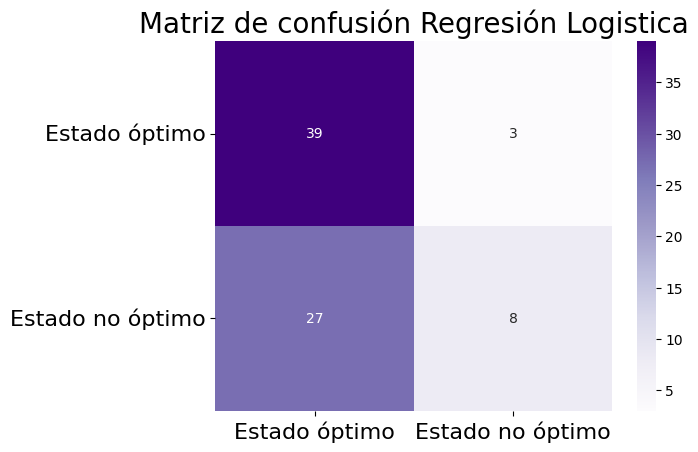

In [ ]:
cm_rl = confusion_matrix(Y1_test, Y1_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Purples', fmt = 'd') 
plt.title('Matriz de confusión Regresión Logistica' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Naives bayes  (Supervisado) 

In [ ]:
df_nb=dfs.copy()

In [ ]:
X2 = df_nb[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y2 = df_nb['Semaforo_alto_impacto']

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# NaiveBayes_dai: Modelo Naives Bayes para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo al total de delitos de alto impacto

NaiveBayes_dai = GaussianNB()
NaiveBayes_dai.fit(X2_train, Y2_train)

GaussianNB()

##### **Predicciones**


In [ ]:
Y2_train_predict = NaiveBayes_dai.predict(X2_train)
MSE = mean_squared_error(Y2_train,Y2_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y2_pred = NaiveBayes_dai.predict(X2_test)
MSE = (mean_squared_error(Y2_test, Y2_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3407821229050279
Pruebas: MSE =0.44155844155844154


In [ ]:
df_nb = pd.DataFrame({'valor_real':Y2_test, 'valor_modelo':Y2_pred})
df_nb = df_nb.reset_index(drop = True)
df_nb.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             0
5           0             1
6           0             0
7           0             0
8           1             0
9           1             0

##### **Validación cruzada**

In [ ]:
scores_nb = cross_val_score(GaussianNB(), X2, Y2, scoring="accuracy", cv=10)
scores_nb

array([0.69230769, 0.57692308, 0.53846154, 0.57692308, 0.73076923,
       0.61538462, 0.68      , 0.56      , 0.6       , 0.68      ])

In [ ]:
scores_nb.mean()

0.6250769230769231

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y2_test, Y2_pred)

[[36  6]
 [28  7]]
True positives: 7
True negatives: 36
False positives: 6
False negative: 28
Precision:55.84415584415584%
Sensibilidad:20.0%
Especificidad:85.71428571428571%


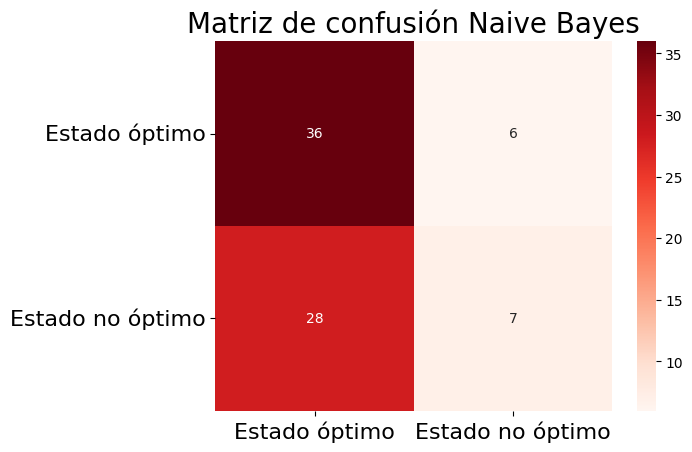

In [ ]:
cm_rl = confusion_matrix(Y2_test, Y2_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Reds', fmt = 'd') 
plt.title('Matriz de confusión Naive Bayes' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Support Vector Machine (SVM).  

In [ ]:
df_SVM=dfs.copy()

In [ ]:
X3 = df_SVM[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y3 = df_SVM['Semaforo_alto_impacto']

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3, random_state = 0)

#### **Entrenamiento**

In [ ]:
# SupportVectorMachine_dai: Modelo de regresión logística para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo al total de delitos de alto impacto

SupportVectorMachine_dai = SVC()
SupportVectorMachine_dai.fit(X3_train, Y3_train) 

SVC()

#### **Predicciones**


In [ ]:
Y3_train_predict = SupportVectorMachine_dai.predict(X3_train)
MSE = mean_squared_error(Y3_train,Y3_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y3_pred = SupportVectorMachine_dai.predict(X3_test)
MSE = (mean_squared_error(Y3_test, Y3_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3240223463687151
Pruebas: MSE =0.44155844155844154


In [ ]:
df_SVM = pd.DataFrame({'valor_real':Y3_test, 'valor_modelo':Y3_pred})
df_SVM = df_SVM.reset_index(drop = True)
df_SVM.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             0
3           1             0
4           1             0
5           0             0
6           0             0
7           0             0
8           1             0
9           1             0

#### **Validación cruzada**

In [ ]:
scores_SVM = cross_val_score(SVC(), X3, Y3, scoring="accuracy", cv=10)
scores_SVM

array([0.65384615, 0.65384615, 0.57692308, 0.65384615, 0.61538462,
       0.65384615, 0.64      , 0.64      , 0.64      , 0.64      ])

In [ ]:
scores_SVM.mean()

0.6367692307692308

#### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y3_test, Y3_pred)

[[42  0]
 [34  1]]
True positives: 1
True negatives: 42
False positives: 0
False negative: 34
Precision:55.84415584415584%
Sensibilidad:2.857142857142857%
Especificidad:100.0%


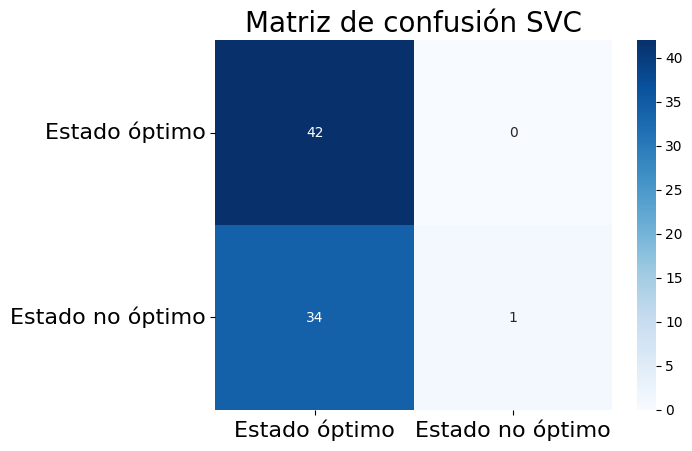

In [ ]:
cm_rl = confusion_matrix(Y3_test, Y3_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión SVC' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Random forest

In [ ]:
df_forest=dfs.copy()

In [ ]:
X4 = df_forest[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y4 = df_forest['Semaforo_alto_impacto']

In [ ]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# random_forest_dai: Modelo Random forest para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo al total de delitos de alto impacto

random_forest_dai = forest(n_estimators=200, random_state = 42)
random_forest_dai.fit(X4_train, Y4_train)

RandomForestClassifier(n_estimators=200, random_state=42)

##### **Validación cruzada**

In [ ]:
scores_rf = cross_val_score(forest(n_estimators=200, random_state = 42), X4, Y4, scoring="accuracy", cv=10)
scores_rf

array([0.69230769, 0.69230769, 0.76923077, 0.73076923, 0.80769231,
       0.84615385, 0.92      , 0.92      , 0.84      , 0.76      ])

In [ ]:
scores_rf.mean()

0.7978461538461538

##### **Predicciones**


In [ ]:
Y4_train_predict = random_forest_dai.predict(X4_train)
MSE = mean_squared_error(Y4_train,Y4_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y4_pred = random_forest_dai.predict(X4_test)
MSE = (mean_squared_error(Y4_test, Y4_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.0
Pruebas: MSE =0.23376623376623376


In [ ]:
df_forest = pd.DataFrame({'valor_real':Y4_test, 'valor_modelo':Y4_pred})
df_forest = df_forest.reset_index(drop = True)
df_forest.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             1
4           1             0
5           0             0
6           0             0
7           0             0
8           1             1
9           1             1

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y4_test, Y4_pred)

[[38  4]
 [14 21]]
True positives: 21
True negatives: 38
False positives: 4
False negative: 14
Precision:76.62337662337663%
Sensibilidad:60.0%
Especificidad:90.47619047619048%


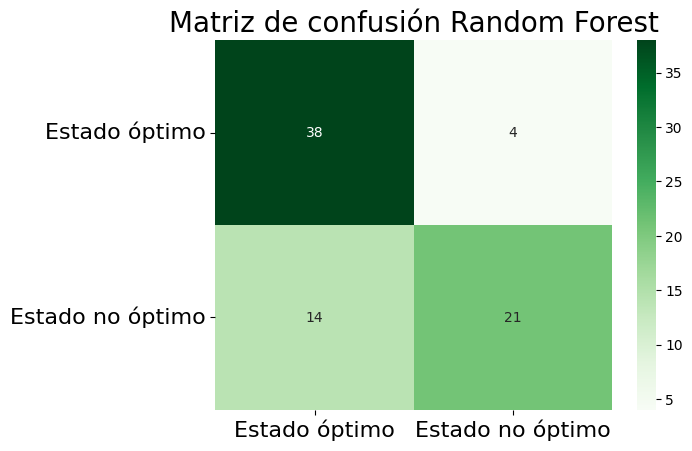

In [ ]:
cm_rl = confusion_matrix(Y4_test, Y4_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Greens', fmt = 'd') 
plt.title('Matriz de confusión Random Forest' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Red neuronal

In [ ]:
df_rn=dfs.copy()

In [ ]:
X5 = df_rn[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y5 = df_rn['Semaforo_alto_impacto']

In [ ]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# redNeuronal_dai: Modelo de red neuronal para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo al total de delitos de alto impacto

redNeuronal_dai = MLPClassifier(hidden_layer_sizes=(15,12),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal_dai.fit(X5_train, Y5_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 12),
              max_iter=20000, tol=1e-07)

##### **Validación cruzada**

In [ ]:
scores_rn = cross_val_score(MLPClassifier(hidden_layer_sizes=(4,3), max_iter=20000,activation ='logistic',tol= 1e-7), X5, Y5, scoring="accuracy", cv=10)
scores_rn

array([0.61538462, 0.61538462, 0.61538462, 0.61538462, 0.61538462,
       0.61538462, 0.6       , 0.6       , 0.6       , 0.6       ])

In [ ]:
scores_rn.mean()

0.6092307692307692

##### **Predicciones**


In [ ]:
Y5_train_predict = redNeuronal_dai.predict(X5_train)
MSE = mean_squared_error(Y5_train,Y5_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y5_pred = redNeuronal_dai.predict(X5_test)
MSE = (mean_squared_error(Y5_test, Y5_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.2569832402234637
Pruebas: MSE =0.42857142857142855


In [ ]:
df_rn = pd.DataFrame({'valor_real':Y5_test, 'valor_modelo':Y5_pred})
df_rn = df_rn.reset_index(drop = True)
df_rn.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             0
3           1             0
4           1             1
5           0             0
6           0             0
7           0             0
8           1             0
9           1             0

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y5_test, Y5_pred)

[[33  9]
 [24 11]]
True positives: 11
True negatives: 33
False positives: 9
False negative: 24
Precision:57.14285714285714%
Sensibilidad:31.428571428571427%
Especificidad:78.57142857142857%


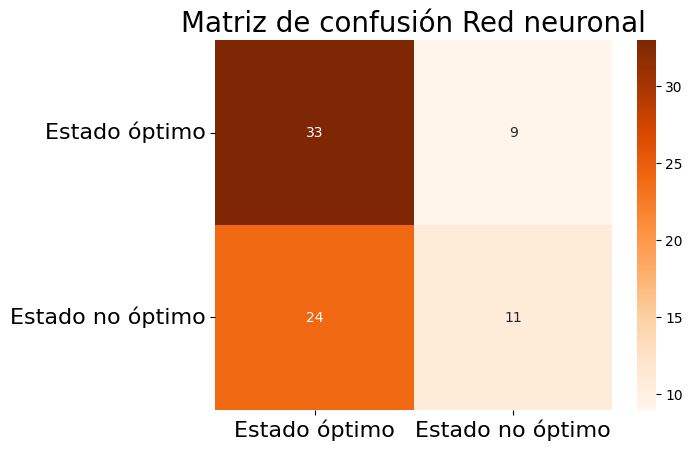

In [ ]:
cm_rl = confusion_matrix(Y5_test, Y5_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Oranges', fmt = 'd') 
plt.title('Matriz de confusión Red neuronal' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

##9 Percepción de la inseguridad en México

###Lectura de datos para aplicar los algoritmos de machine learning





In [ ]:
df_semaforo= pd.read_csv("https://raw.githubusercontent.com/userlalo/G20_ProcesamientoDatosPython/main/semaforo.csv", encoding='latin1')
df_semaforo

clave_entidad  Semaforo_alto_impacto  Percepcion_inseguridad   año
0                1                      0                       0  2022
1                2                      1                       0  2022
2                3                      0                       0  2022
3                4                      0                       0  2022
4                5                      0                       0  2022
..             ...                    ...                     ...   ...
251             28                      1                       1  2015
252             29                      0                       0  2015
253             30                      0                       1  2015
254             31                      0                       0  2015
255             32                      0                       1  2015

[256 rows x 4 columns]

In [ ]:
dfs = pd.merge(df, df_semaforo, how='outer',on=['año','clave_entidad'])
dfs = dfs.dropna()
dfs['Semaforo_alto_impacto']=dfs['Semaforo_alto_impacto'].astype(int)
dfs['Percepcion_inseguridad']=dfs['Percepcion_inseguridad'].astype(int)
dfs.head()

año  clave_entidad               entidad  Lesiones  Homicidio  \
0  2015              1        Aguascalientes    3429.0      229.0   
1  2015              2       Baja California   16251.0     1338.0   
2  2015              3   Baja California Sur    1588.0      228.0   
3  2015              4              Campeche     265.0      141.0   
4  2015              5  Coahuila de Zaragoza    6077.0      624.0   

   Libertad Personal  Contra la Vida  Extorsion  Semaforo_alto_impacto  \
0               61.0            70.0       42.0                      0   
1              841.0           222.0      224.0                      1   
2               37.0             4.0       49.0                      0   
3               11.0            10.0       34.0                      0   
4               17.0            12.0       36.0                      1   

   Percepcion_inseguridad  
0                       0  
1                       0  
2                       0  
3                       0  
4                       1

### Regresión Logística  (Supervisado) Identificar el nivel de de inseguridad que provocan los delitos de alto impacto

In [ ]:
df_reg_log=dfs.copy()

In [ ]:
X1 = df_reg_log[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y1 = df_reg_log['Percepcion_inseguridad']

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# logic_model_pi: Modelo de regresión logística para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo a la percepción de la inseguridad

logic_model = linear_model.LogisticRegression(max_iter = 100_000)
logic_model.fit(X1_train, Y1_train)

LogisticRegression(max_iter=100000)

##### **Predicciones**


In [ ]:
Y1_train_predict = logic_model.predict(X1_train)
MSE = mean_squared_error(Y1_train,Y1_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y1_pred = logic_model.predict(X1_test)
MSE = (mean_squared_error(Y1_test, Y1_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.2681564245810056
Pruebas: MSE =0.3116883116883117


In [ ]:
df_reg_log = pd.DataFrame({'valor_real':Y1_test, 'valor_modelo':Y1_pred})
df_reg_log = df_reg_log.reset_index(drop = True)
df_reg_log.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             1
5           1             0
6           0             0
7           0             0
8           1             0
9           1             1

##### **Validación cruzada**

In [ ]:
scores_reglog = cross_val_score(LogisticRegression(), X1, Y1, scoring="accuracy", cv=10)
scores_reglog

array([0.65384615, 0.65384615, 0.65384615, 0.73076923, 0.69230769,
       0.65384615, 0.68      , 0.8       , 0.6       , 0.64      ])

In [ ]:
scores_reglog.mean()

0.6758461538461538

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y1_test, Y1_pred)

[[35  5]
 [19 18]]
True positives: 18
True negatives: 35
False positives: 5
False negative: 19
Precision:68.83116883116884%
Sensibilidad:48.64864864864865%
Especificidad:87.5%


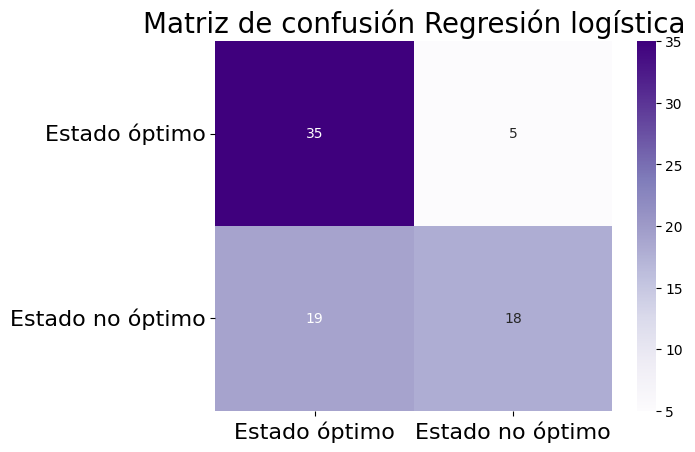

In [ ]:
cm_rl = confusion_matrix(Y1_test, Y1_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Purples', fmt = 'd') 
plt.title('Matriz de confusión Regresión logística' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Naives bayes  (Supervisado) 

In [ ]:
df_nb=dfs.copy()

In [ ]:
X2 = df_nb[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y2 = df_nb['Percepcion_inseguridad']

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# NaiveBayes_pi: Modelo de Naive Bayes para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo a la percepción de la inseguridad

NaiveBayes_pi = GaussianNB()
NaiveBayes_pi.fit(X2_train, Y2_train)

GaussianNB()

##### **Predicciones**


In [ ]:
Y2_train_predict = NaiveBayes_pi.predict(X2_train)
MSE = mean_squared_error(Y2_train,Y2_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y2_pred = NaiveBayes_pi.predict(X2_test)
MSE = (mean_squared_error(Y2_test, Y2_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3128491620111732
Pruebas: MSE =0.4025974025974026


In [ ]:
df_nb = pd.DataFrame({'valor_real':Y2_test, 'valor_modelo':Y2_pred})
df_nb = df_nb.reset_index(drop = True)
df_nb.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             0
5           1             1
6           0             0
7           0             0
8           1             0
9           1             0

##### **Validación cruzada**

In [ ]:
scores_nb = cross_val_score(GaussianNB(), X2, Y2, scoring="accuracy", cv=10)
scores_nb

array([0.53846154, 0.65384615, 0.61538462, 0.65384615, 0.61538462,
       0.65384615, 0.72      , 0.8       , 0.72      , 0.68      ])

In [ ]:
scores_nb.mean()

0.6650769230769231

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y2_test, Y2_pred)

[[36  4]
 [27 10]]
True positives: 10
True negatives: 36
False positives: 4
False negative: 27
Precision:59.74025974025974%
Sensibilidad:27.027027027027028%
Especificidad:90.0%


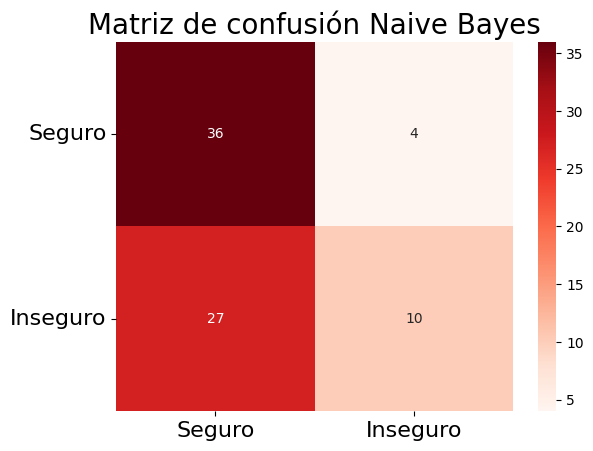

In [ ]:
cm_rl = confusion_matrix(Y2_test, Y2_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Reds', fmt = 'd') 
plt.title('Matriz de confusión Naive Bayes' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Seguro","Inseguro"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Seguro","Inseguro"], fontsize=16, rotation = 0);

### Support Vector Machine (SVM).  

In [ ]:
df_SVM=dfs.copy()

In [ ]:
X3 = df_SVM[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y3 = df_SVM['Percepcion_inseguridad']

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3, random_state = 0)

#### **Entrenamiento**

In [ ]:
# SupportVectorMachine_pi: Modelo SVC para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo a la percepción de la inseguridad

SupportVectorMachine_pi = SVC()
SupportVectorMachine_pi.fit(X3_train, Y3_train) 

SVC()

#### **Predicciones**


In [ ]:
Y3_train_predict = SupportVectorMachine_pi.predict(X3_train)
MSE = mean_squared_error(Y3_train,Y3_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y3_pred = SupportVectorMachine_pi.predict(X3_test)
MSE = (mean_squared_error(Y3_test, Y3_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.3240223463687151
Pruebas: MSE =0.45454545454545453


In [ ]:
df_SVM = pd.DataFrame({'valor_real':Y3_test, 'valor_modelo':Y3_pred})
df_SVM = df_SVM.reset_index(drop = True)
df_SVM.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             0
5           1             0
6           0             0
7           0             0
8           1             0
9           1             0

#### **Validación cruzada**

In [ ]:
scores_SVM = cross_val_score(SVC(), X3, Y3, scoring="accuracy", cv=10)
scores_SVM

array([0.57692308, 0.61538462, 0.65384615, 0.73076923, 0.69230769,
       0.61538462, 0.64      , 0.72      , 0.64      , 0.68      ])

In [ ]:
scores_SVM.mean()

0.6564615384615384

#### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y3_test, Y3_pred)

[[38  2]
 [33  4]]
True positives: 4
True negatives: 38
False positives: 2
False negative: 33
Precision:54.54545454545454%
Sensibilidad:10.81081081081081%
Especificidad:95.0%


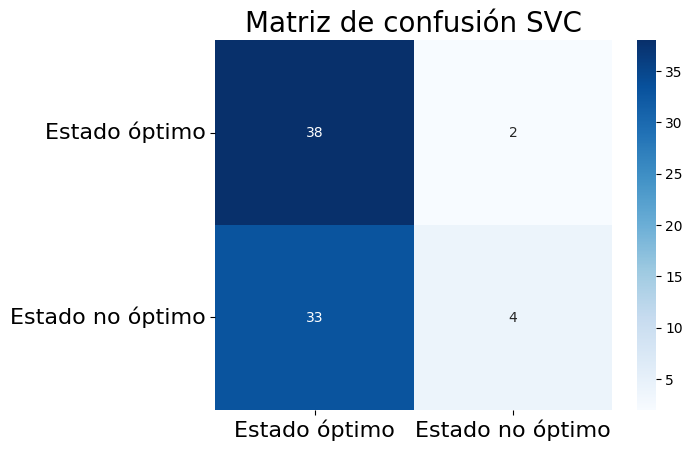

In [ ]:
cm_rl = confusion_matrix(Y3_test, Y3_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión SVC' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Random forest

In [ ]:
df_forest=dfs.copy()

In [ ]:
X4 = df_forest[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y4 = df_forest['Percepcion_inseguridad']

In [ ]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# random_forest_pi: Modelo de Random forest para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo a la percepción de la inseguridad

random_forest_pi = forest(n_estimators=200, random_state = 42)
random_forest_pi.fit(X4_train, Y4_train)

RandomForestClassifier(n_estimators=200, random_state=42)

##### **Validación cruzada**

In [ ]:
scores_rf = cross_val_score(forest(n_estimators=200, random_state = 42), X4, Y4, scoring="accuracy", cv=10)
scores_rf

array([0.73076923, 0.69230769, 0.73076923, 0.76923077, 0.84615385,
       0.80769231, 0.96      , 0.96      , 0.72      , 0.76      ])

In [ ]:
scores_rf.mean()

0.7976923076923076

##### **Predicciones**


In [ ]:
Y4_train_predict = random_forest_pi.predict(X4_train)
MSE = mean_squared_error(Y4_train,Y4_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y4_pred = random_forest_pi.predict(X4_test)
MSE = (mean_squared_error(Y4_test, Y4_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.0
Pruebas: MSE =0.18181818181818182


In [ ]:
df_forest = pd.DataFrame({'valor_real':Y4_test, 'valor_modelo':Y4_pred})
df_forest = df_forest.reset_index(drop = True)
df_forest.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             1
3           1             0
4           1             1
5           1             1
6           0             1
7           0             0
8           1             0
9           1             0

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y4_test, Y4_pred)

[[37  3]
 [11 26]]
True positives: 26
True negatives: 37
False positives: 3
False negative: 11
Precision:81.81818181818183%
Sensibilidad:70.27027027027027%
Especificidad:92.5%


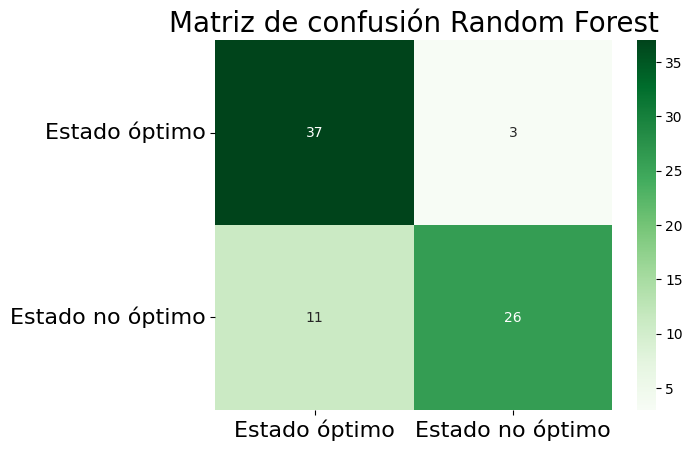

In [ ]:
cm_rl = confusion_matrix(Y4_test, Y4_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Greens', fmt = 'd') 
plt.title('Matriz de confusión Random Forest' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

### Red neuronal

In [ ]:
df_rn=dfs.copy()

In [ ]:
X5 = df_rn[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]
Y5 = df_rn['Percepcion_inseguridad']

In [ ]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.3, random_state = 0)

##### **Entrenamiento**

In [ ]:
# redNeuronal_pi: Modelo de red neuronal para determinar si el estado de la república es óptimo(0) o no(1) para el nearshoring 
# de acuerdo a la percepción de la inseguridad

redNeuronal_pi = MLPClassifier(hidden_layer_sizes=(12,10),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal_pi.fit(X5_train, Y5_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(12, 10),
              max_iter=20000, tol=1e-07)

##### **Validación cruzada**

In [ ]:
scores_rn = cross_val_score(MLPClassifier(hidden_layer_sizes=(12,10), max_iter=20000,activation ='logistic',tol= 1e-7), X5, Y5, scoring="accuracy", cv=10)
scores_rn

array([0.61538462, 0.57692308, 0.57692308, 0.57692308, 0.57692308,
       0.57692308, 0.6       , 0.6       , 0.6       , 0.6       ])

In [ ]:
scores_rn.mean()

0.5899999999999999

##### **Predicciones**


In [ ]:
Y5_train_predict = redNeuronal_pi.predict(X5_train)
MSE = mean_squared_error(Y5_train,Y5_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

Y5_pred = redNeuronal_pi.predict(X5_test)
MSE = (mean_squared_error(Y5_test, Y5_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.2849162011173184
Pruebas: MSE =0.42857142857142855


In [ ]:
df_rn = pd.DataFrame({'valor_real':Y5_test, 'valor_modelo':Y5_pred})
df_rn = df_rn.reset_index(drop = True)
df_rn.head(10)

valor_real  valor_modelo
0           0             0
1           0             0
2           1             0
3           1             1
4           1             1
5           1             0
6           0             0
7           0             0
8           1             1
9           1             1

##### **Evaluación del modelo**

In [ ]:
evaluacion_algoritmo(Y5_test, Y5_pred)

[[35  5]
 [28  9]]
True positives: 9
True negatives: 35
False positives: 5
False negative: 28
Precision:57.14285714285714%
Sensibilidad:24.324324324324326%
Especificidad:87.5%


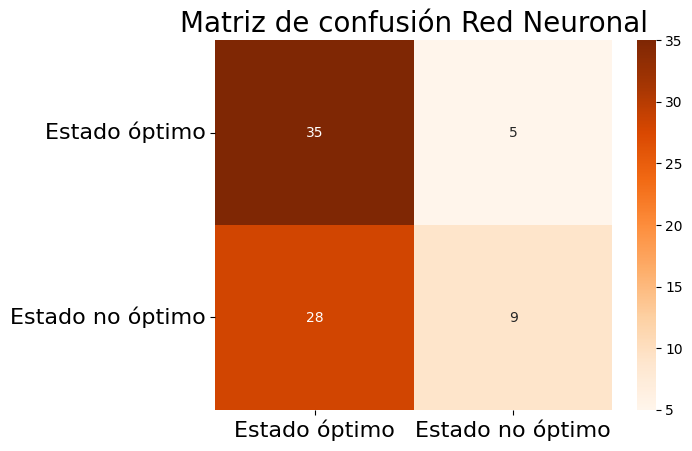

In [ ]:
cm_rl = confusion_matrix(Y5_test, Y5_pred)
sns.heatmap(cm_rl, annot= True, cmap = 'Oranges', fmt = 'd') 
plt.title('Matriz de confusión Red Neuronal' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Estado óptimo","Estado no óptimo"], fontsize=16, rotation = 0);

## 10 Predicciones para el 2023

Usando los modelos de machine learning que mejor resultado dieron se obtuvieron mapas de la republica  mostrando los estados optimos para el nearshoring de acuerdo al semaforo delitcivo y a la percepcion de inseguridad de la población para el año 2023.

In [ ]:
#Seleccionamos los datos que tenemos del 2023
df2023=df[(df["año"] == 2023)]

In [ ]:
X_2023 = df2023[["Lesiones", "Homicidio", "Libertad Personal", "Contra la Vida", "Extorsion" ]]

In [ ]:
X_2023=X_2023*12

### Nearshoring y semáforo de alto impacto de 2023

Aplicamos el modelo de Random forest entrenado y obtenido de la sesión anterior para obtener los estados óptimos para el nearshoring de acuerdo a la semáforo de delitos de alto impacto

In [ ]:
Y2023_dai = random_forest_dai.predict(X_2023)
Y2023_dai

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
df2023['Semaforo_alto_impacto']=Y2023_dai

<ipython-input-204-8fca681775ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['Semaforo_alto_impacto']=Y2023_dai


In [ ]:
import pandas as pd
import folium
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df2023 = df2023.replace( "Ciudad de México", "Distrito Federal")
df2023 = df2023.replace( "Coahuila de Zaragoza", "Coahuila")
df2023 = df2023.replace( "Michoacán de Ocampo", "Michoacán")
df2023 = df2023.replace( "Veracruz de Ignacio de la Llave", "Veracruz")

map = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Clusters Delitos',
    data = df2023,
    columns = ['entidad', 'Semaforo_alto_impacto'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrBr',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Estados óptimos para el Nearshoring 2023"
).add_to(map)

folium.LayerControl().add_to(map)

map

### Nearshoring de acuerdo a la percpeción de la población 2023

Aplicamos el modelo de Random forest entrenado y obtenido de la sesión anterior para obtener los estados óptimos para el nearshoring de acuerdo a la percepción de inseguridad de la población

In [ ]:
Y2023_pi = random_forest_pi.predict(X_2023)

In [ ]:
df2023['Percepcion_inseguridad']=Y2023_pi

In [ ]:
import pandas as pd
import folium
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df2023 = df2023.replace( "Ciudad de México", "Distrito Federal")
df2023 = df2023.replace( "Coahuila de Zaragoza", "Coahuila")
df2023 = df2023.replace( "Michoacán de Ocampo", "Michoacán")
df2023 = df2023.replace( "Veracruz de Ignacio de la Llave", "Veracruz")

map = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Clusters Delitos',
    data = df2023,
    columns = ['entidad', 'Percepcion_inseguridad'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrBr',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Estados optimos para el Nearshoring 2023"
).add_to(map)

folium.LayerControl().add_to(map)

map

In [ ]:
import pandas as pd
import folium
estados_mx_json = 'https://raw.githubusercontent.com/isaacarroyov/crime_analysis_mx2017/master/data/estados_mx.json'
df2023 = df2023.replace( "Ciudad de México", "Distrito Federal")
df2023 = df2023.replace( "Coahuila de Zaragoza", "Coahuila")
df2023 = df2023.replace( "Michoacán de Ocampo", "Michoacán")
df2023 = df2023.replace( "Veracruz de Ignacio de la Llave", "Veracruz")

map = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Proyeccion Estados optimos nearshoring 2023',
    data = df2023,
    columns = ['entidad', 'Semaforo_alto_impacto'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrBr',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Estados optimos para el Nearshoring 2022"
).add_to(map)

folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Proyeccion percepcion estados optimos Nearshoring',
    data = df2023,
    columns = ['entidad', 'Percepcion_inseguridad'],
    key_on = "feature.properties.name",
    fill_color = 'YlOrBr',
    nan_fill_opacity=.3,
    fill_opacity= 0.7,
    line_weight=.5,
    line_opacity=0.6,
    smooth_factor=0.7,
    highlight = "True",
    legend_name = "Estados optimos para el Nearshoring 2022"
).add_to(map)

folium.LayerControl().add_to(map)

map